In [1]:
#匯入需要的套件
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

In [2]:
#匯入資料
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
#拿掉RowNumber、CustomerId、Surname
df = df.drop(columns=['RowNumber', 'CustomerId', "Surname"])
df.shape

(10000, 11)

In [4]:
#確認是否有缺失值
df.isnull().any()

CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [5]:
#確認是否有重複值
df[df.duplicated(keep='first')].shape

(0, 11)

In [6]:
#確認變數的型態
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
#提高畫圖的解析度
plt.rcParams['savefig.dpi'] = 300 #图片像素
plt.rcParams['figure.dpi'] = 300 #分辨率

Geography
France     5014
Germany    2509
Spain      2477
dtype: int64

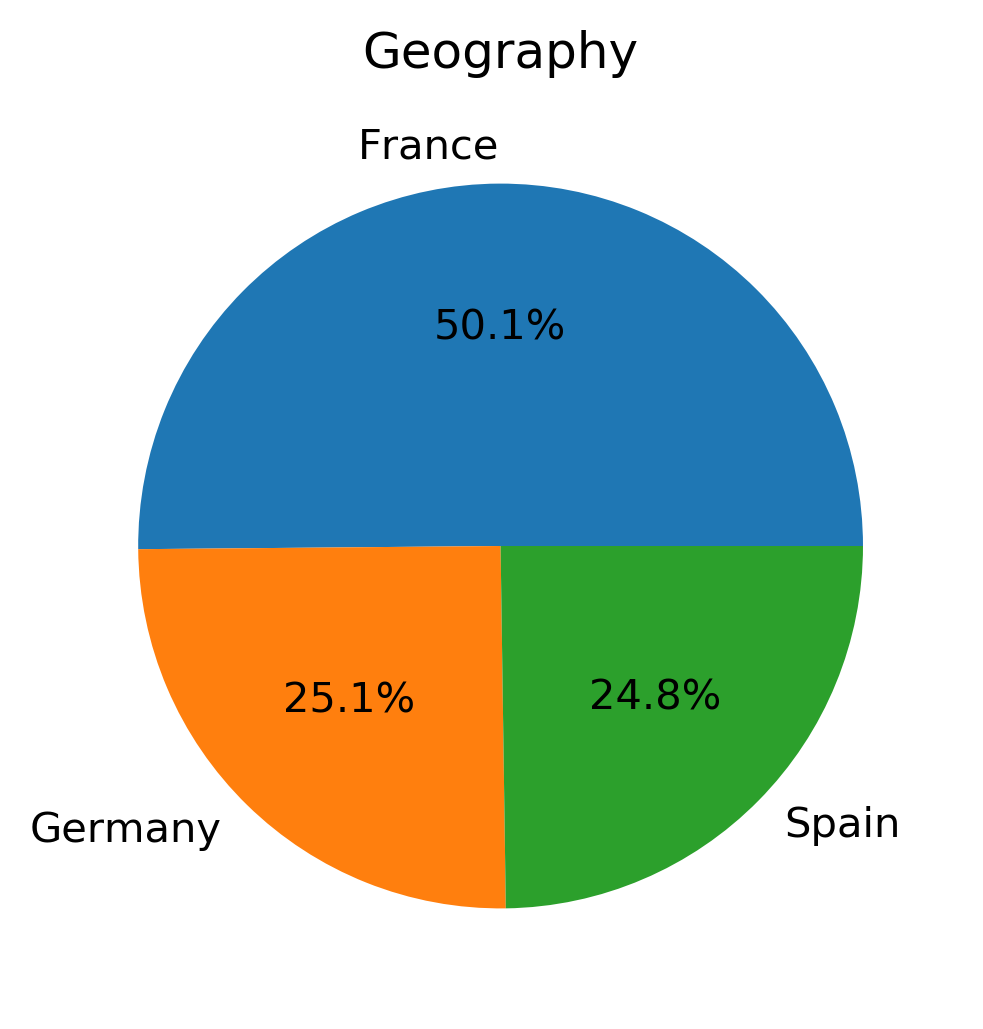

In [8]:
#確認各類別變數的比例
plt.pie(df.groupby("Geography").size() ,
    labels = np.sort(df['Geography'].unique()),
    autopct='%1.1f%%',
    ) 
plt.title("Geography")
df.groupby("Geography").size()

Gender
Female    4543
Male      5457
dtype: int64

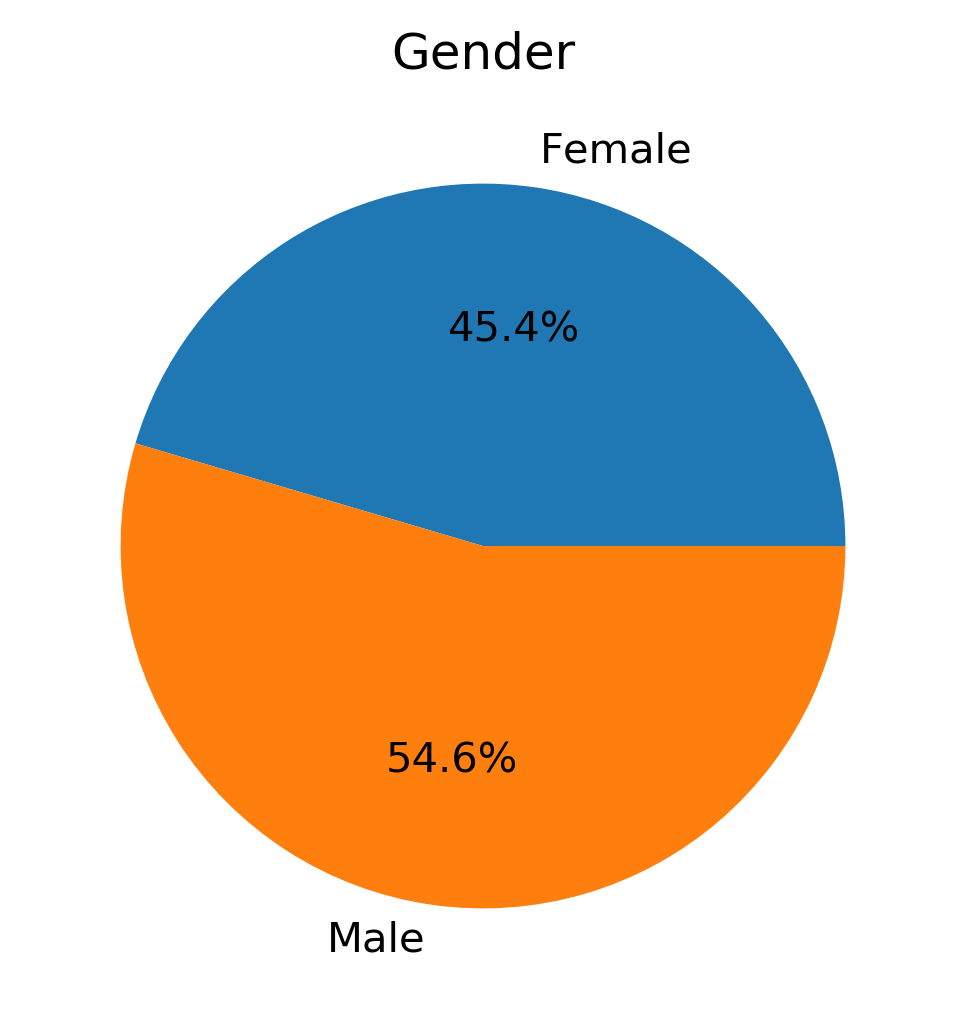

In [9]:
#確認各類別變數的比例
plt.pie(df.groupby("Gender").size() ,
    labels = np.sort(df['Gender'].unique()),
    autopct='%1.1f%%',
    ) 
plt.title("Gender")
df.groupby("Gender").size()

HasCrCard
0    2945
1    7055
dtype: int64

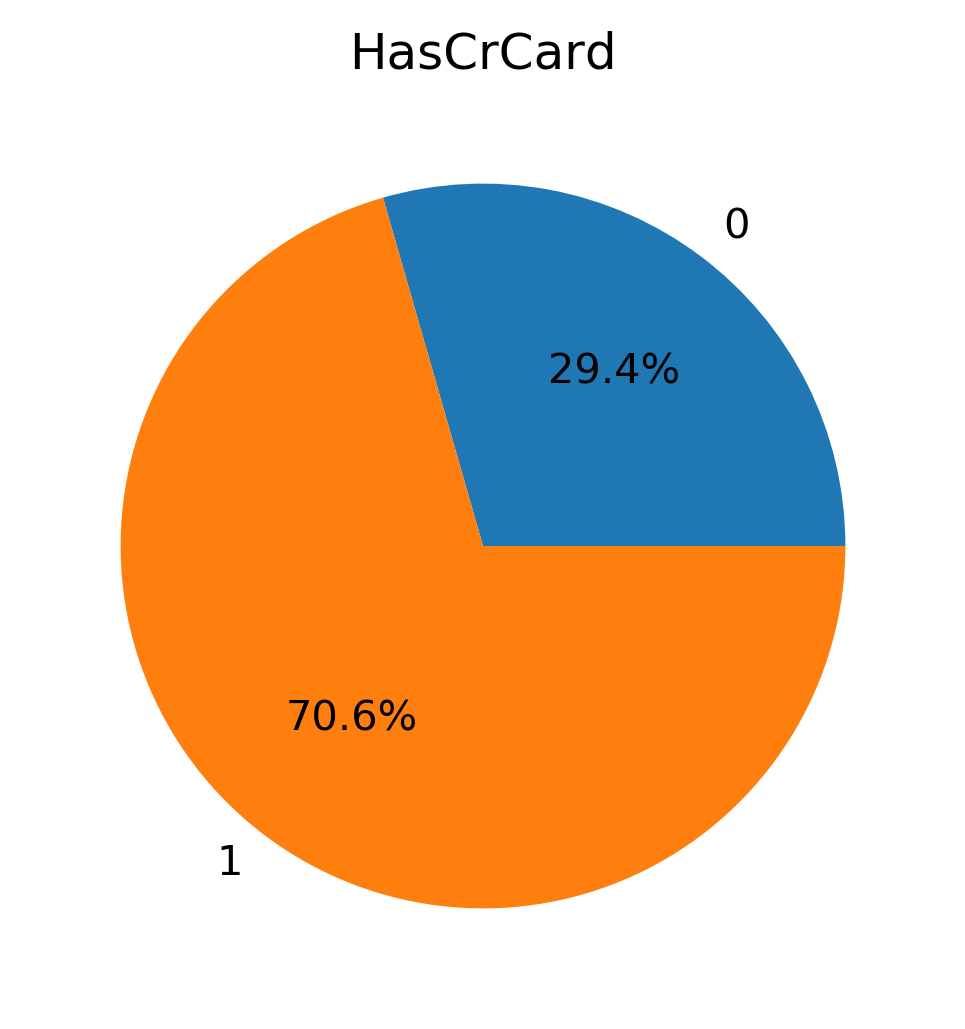

In [10]:
#確認各類別變數的比例
plt.pie(df.groupby("HasCrCard").size() ,
    labels = np.sort(df['HasCrCard'].unique()),
    autopct='%1.1f%%',
    ) 
plt.title("HasCrCard")
df.groupby("HasCrCard").size()

IsActiveMember
0    4849
1    5151
dtype: int64

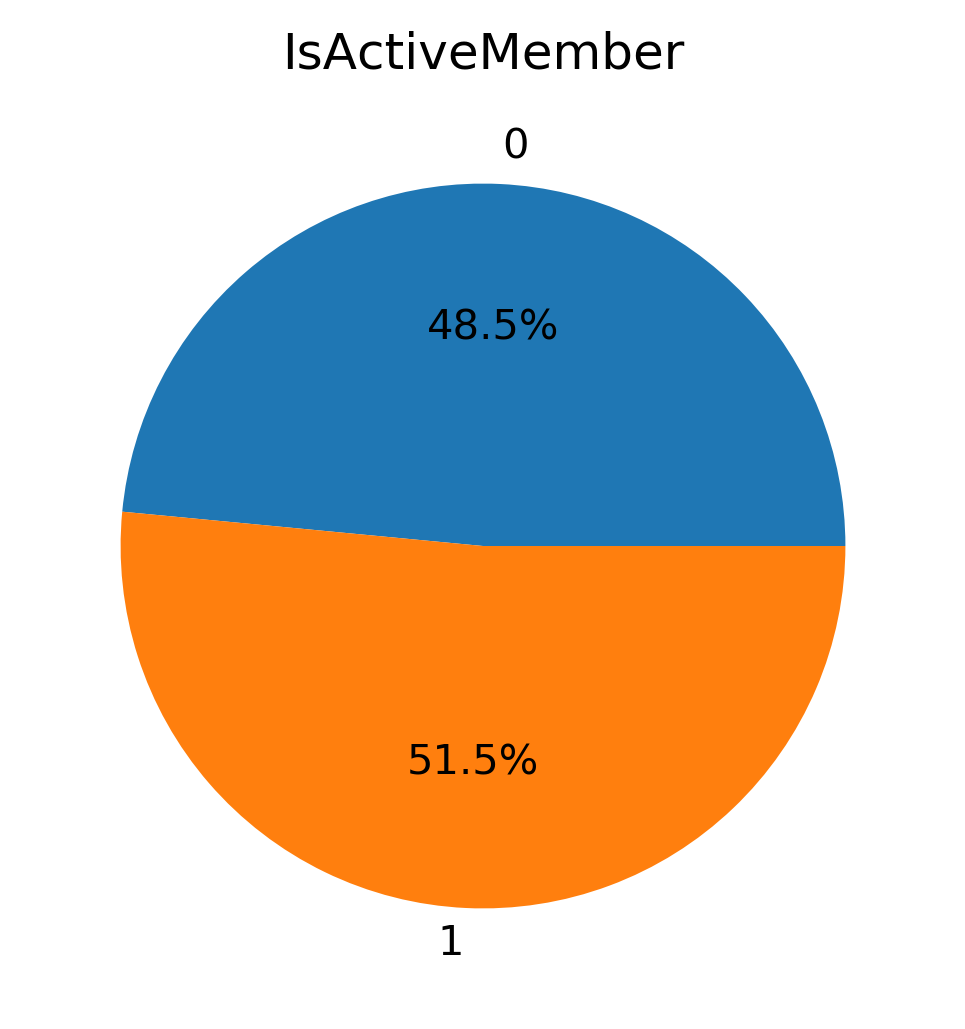

In [11]:
#確認各類別變數的比例
plt.pie(df.groupby("IsActiveMember").size() ,
    labels = np.sort(df['IsActiveMember'].unique()),
    autopct='%1.1f%%',
    ) 
plt.title("IsActiveMember")
df.groupby("IsActiveMember").size()

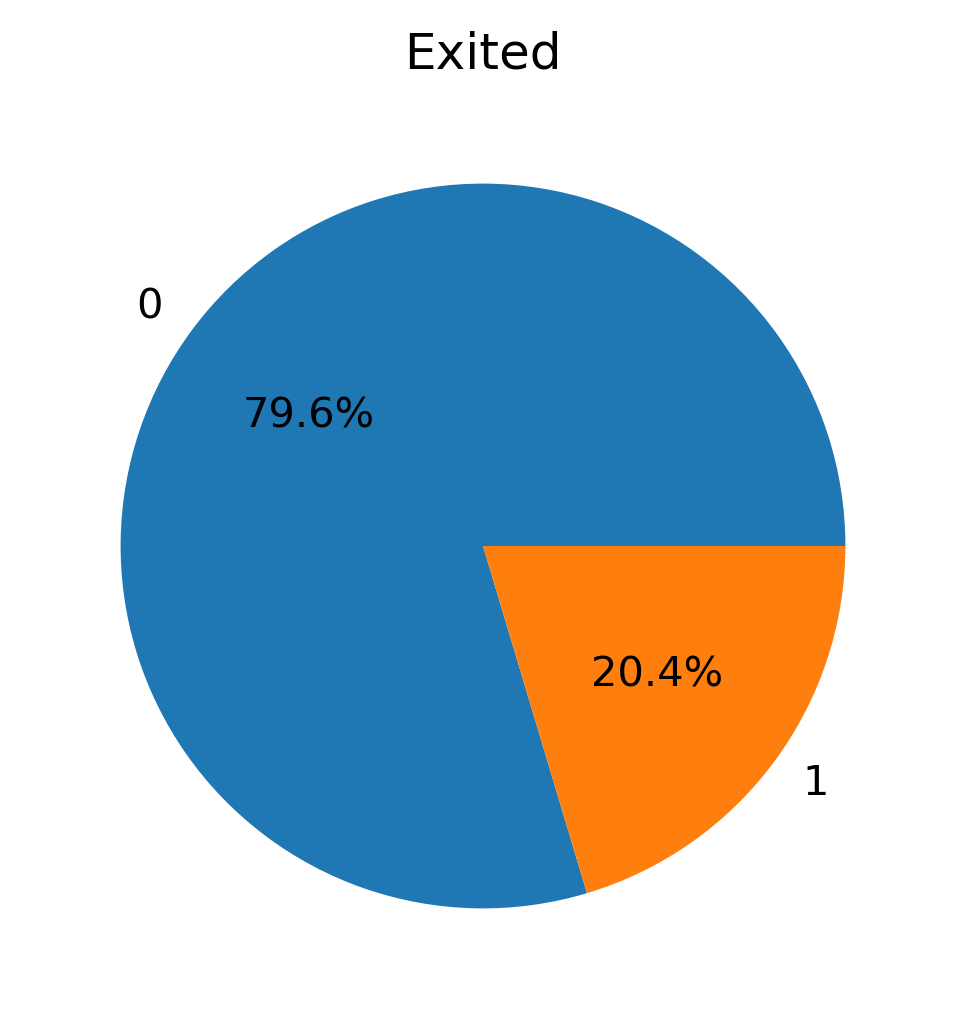

Exited
0    7963
1    2037
dtype: int64

In [12]:
#確認各類別變數的比例
plt.pie(df.groupby("Exited").size() ,
    labels = np.sort(df['Exited'].unique()),
    autopct='%1.1f%%',
    ) 
plt.title("Exited")
plt.show()
df.groupby("Exited").size()

In [13]:
#看看平均值與標準差
df.describe().drop(columns=['HasCrCard', 'IsActiveMember', "Exited"])

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F1F06517C8>,
      dtype=object)

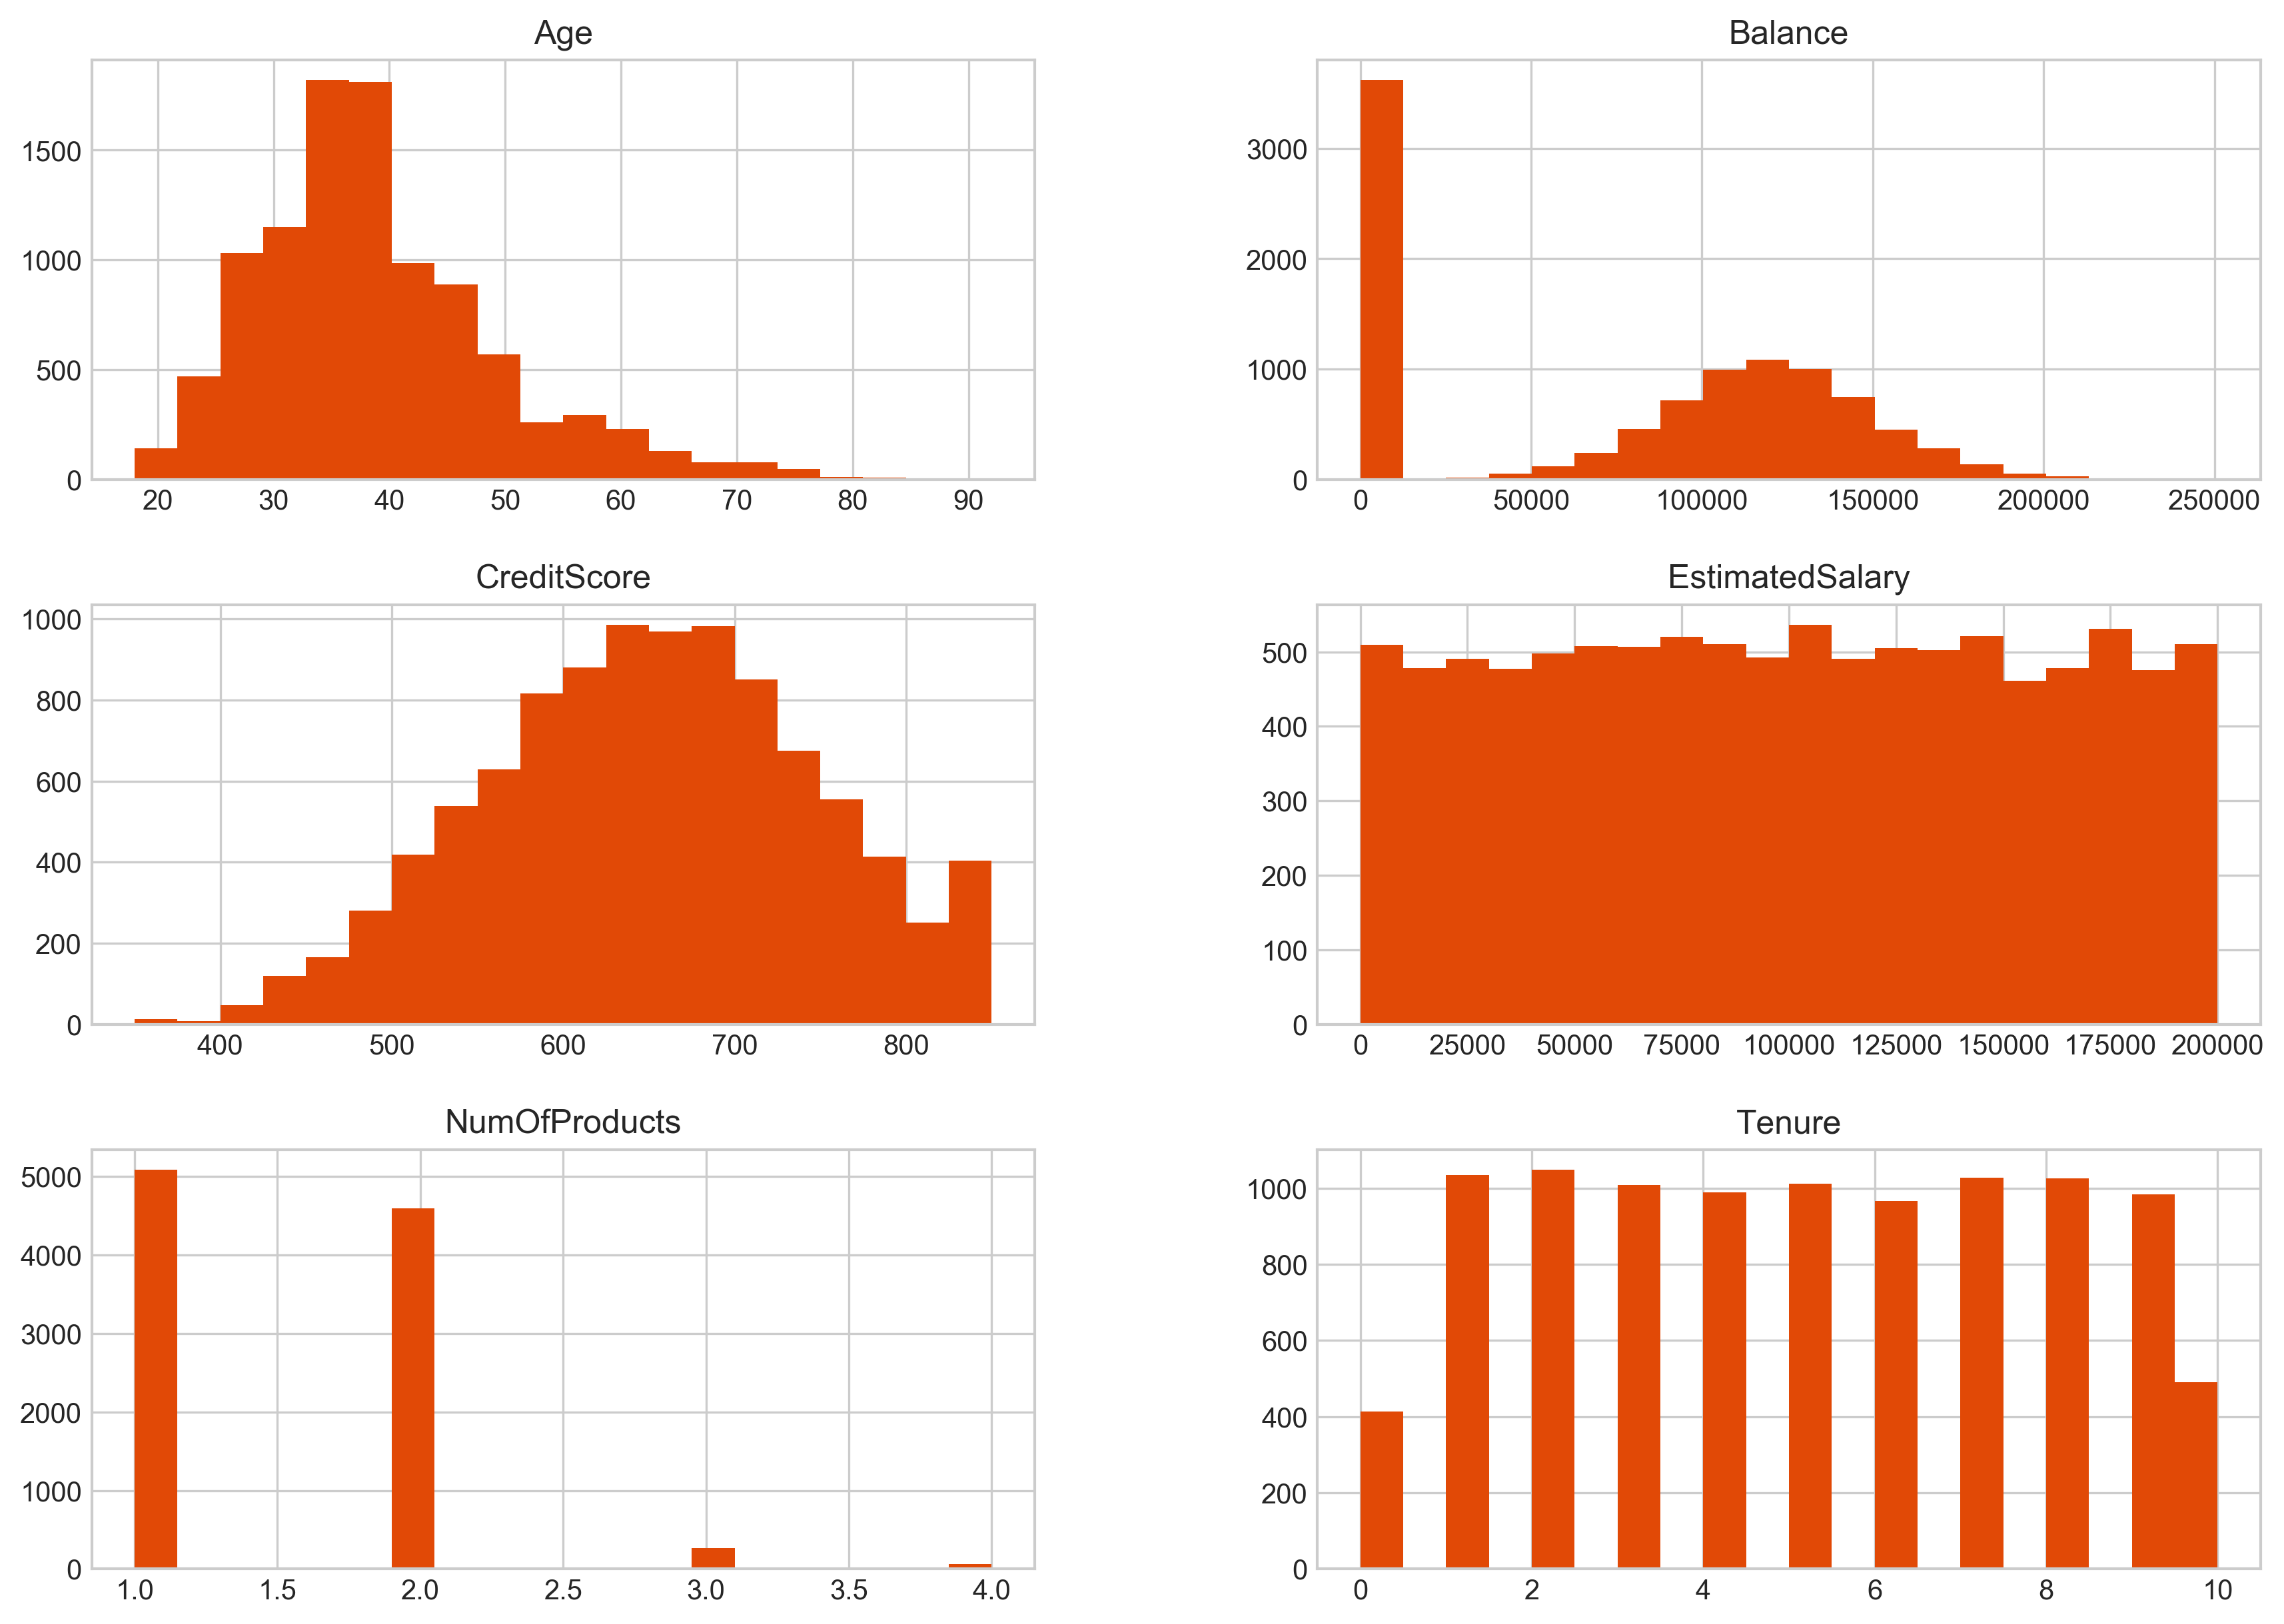

In [14]:
#劃出這些變數的分配圖
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

df.drop(columns=['HasCrCard', 'IsActiveMember', "Exited"]).hist(bins=20, figsize=(14,10), color='#E14906')

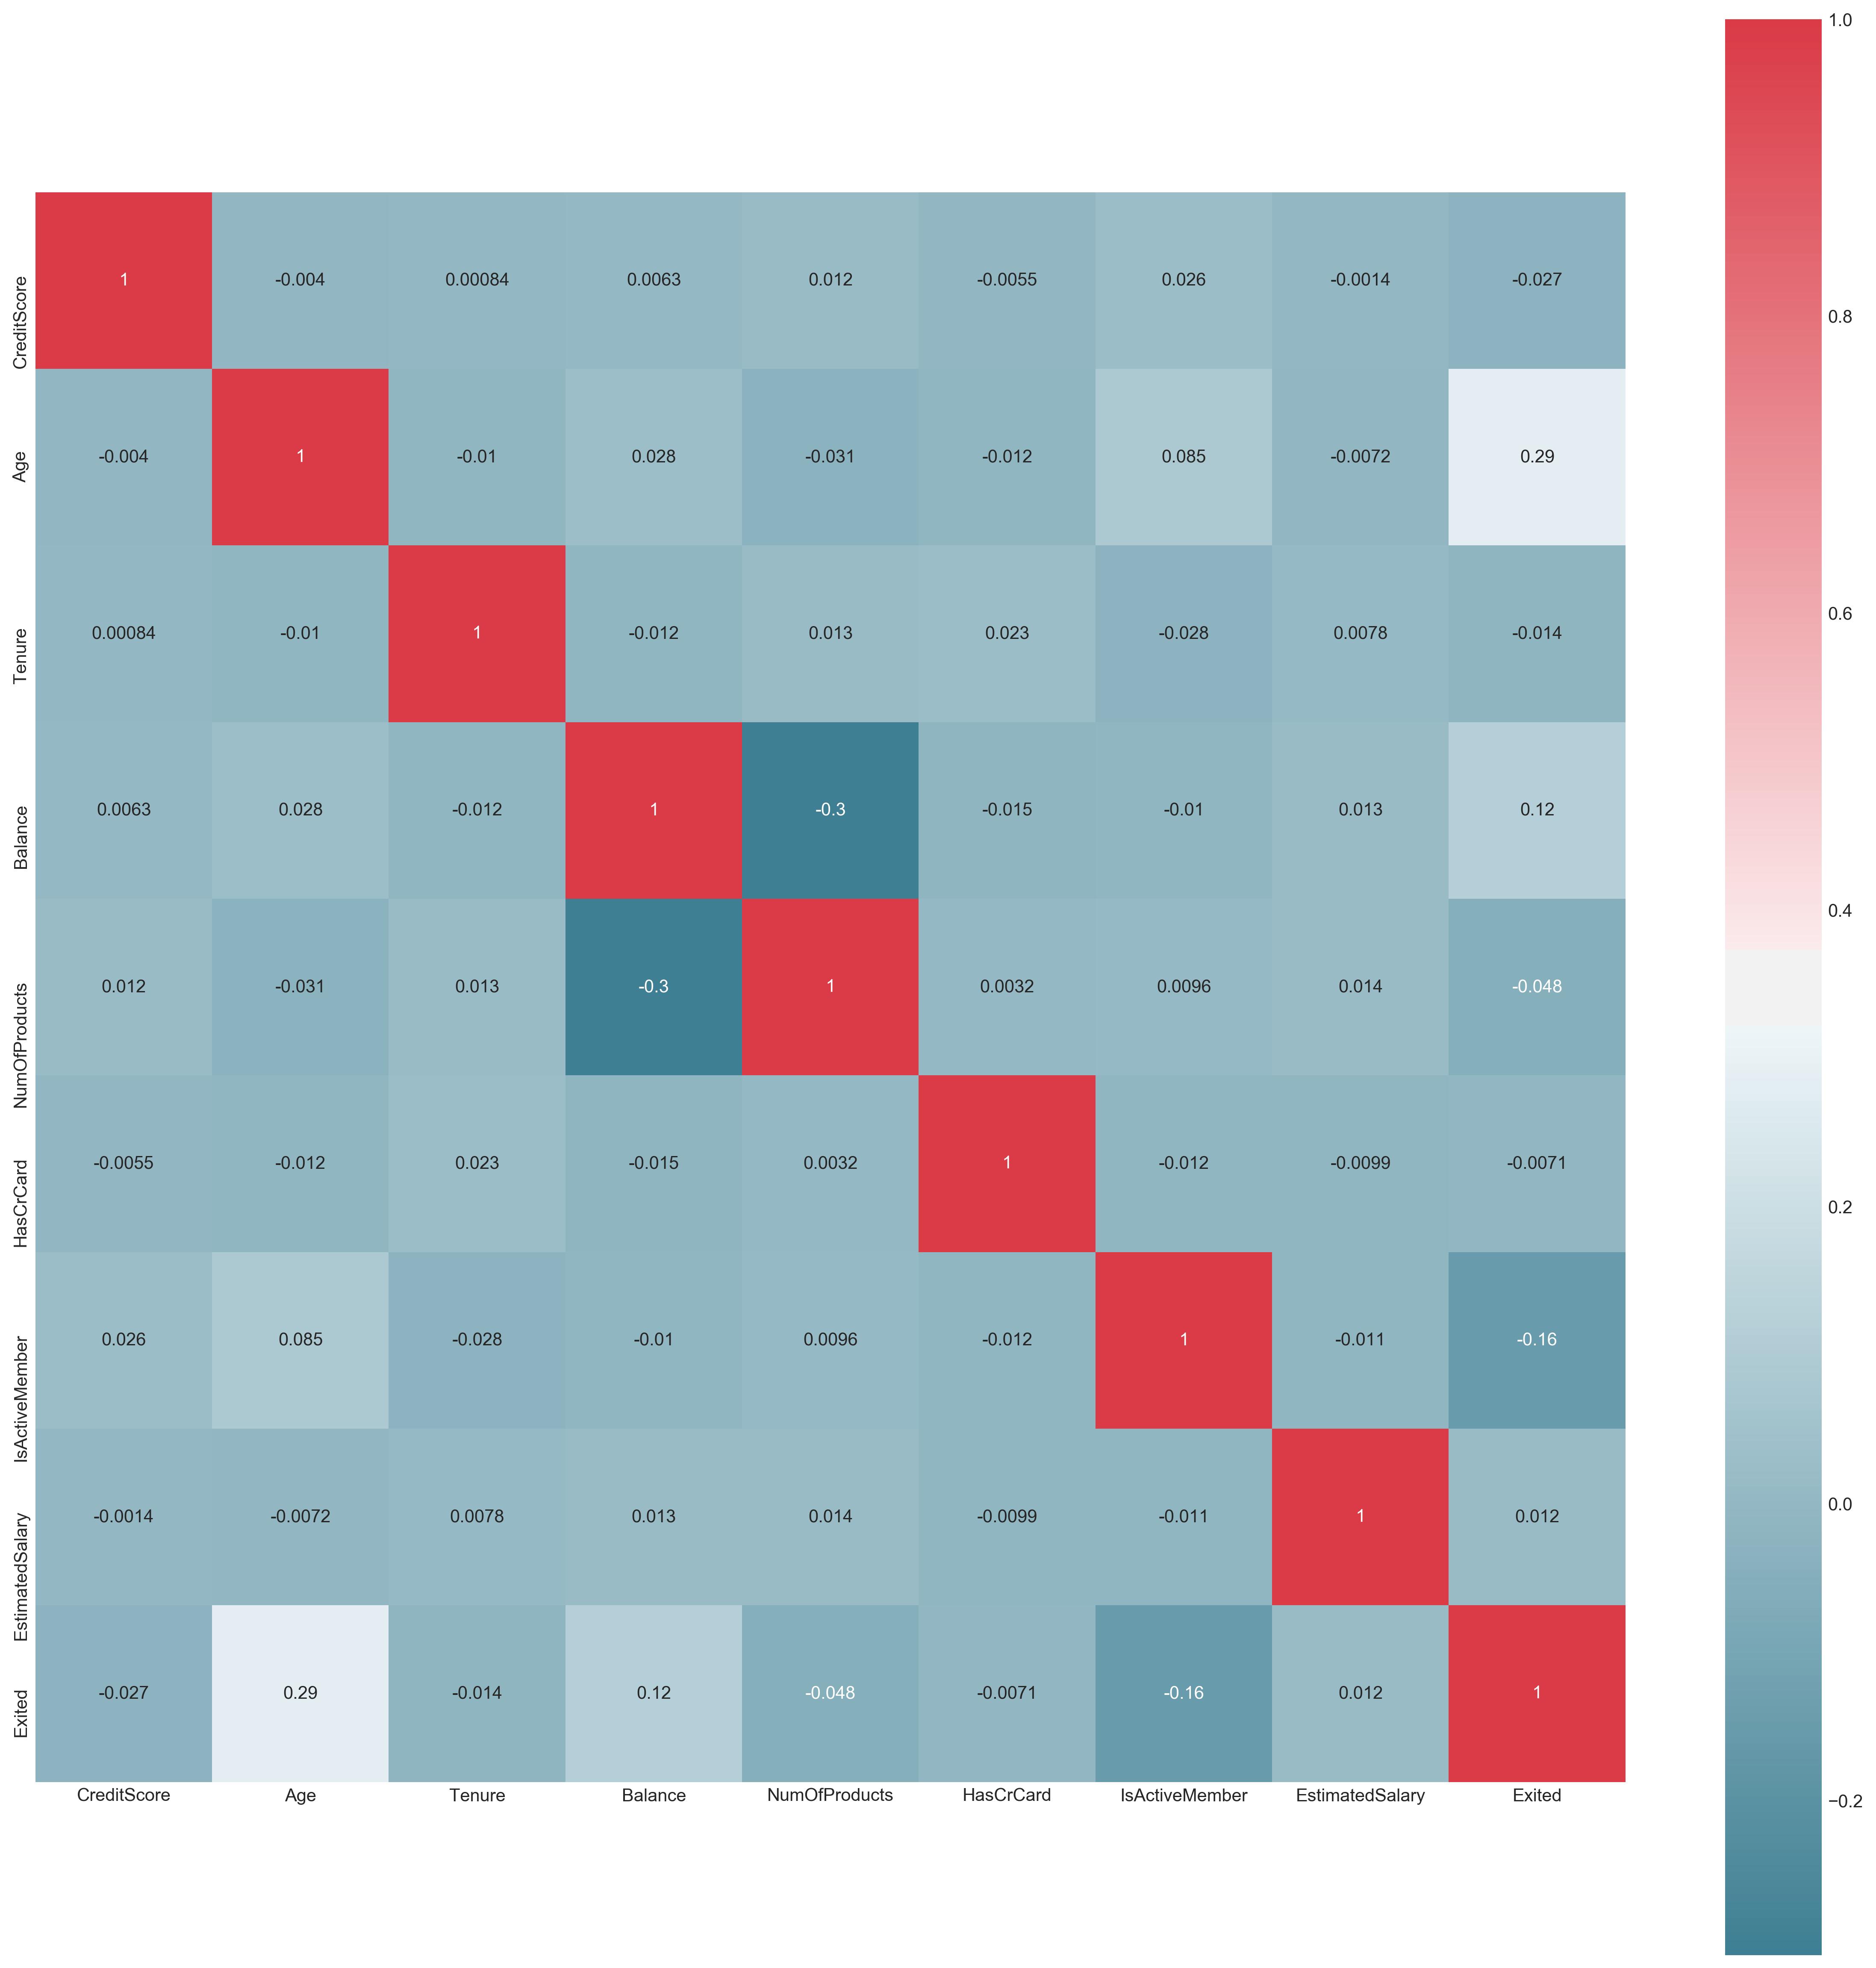

In [15]:
#畫熱度圖
f, ax = plt.subplots(figsize=(20, 20))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax = ax, annot = True)

C:\Users\Chien Hua Lo\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


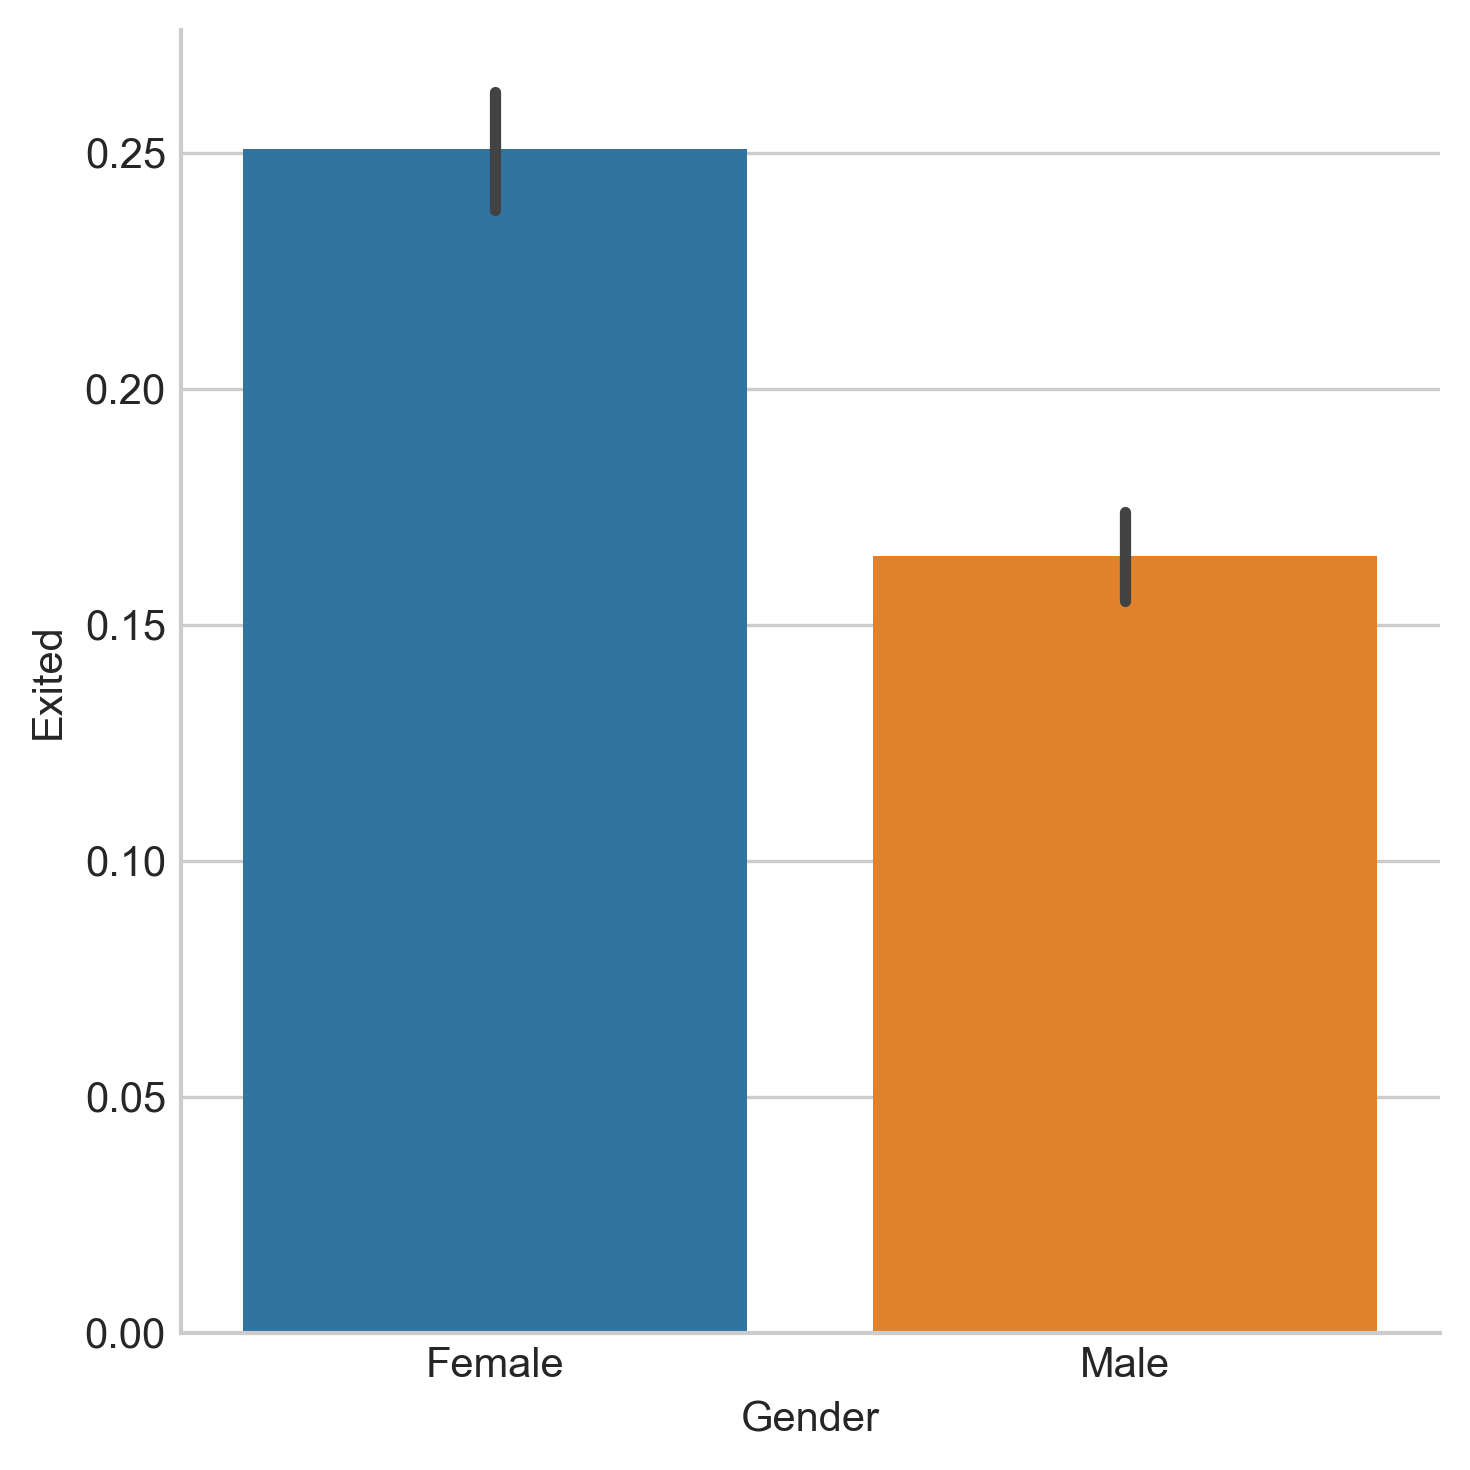

In [16]:
#劃出各類別變數跟eixt之間的關係
sns.factorplot(x = 'Gender', y='Exited', kind = 'bar', data=df)

C:\Users\Chien Hua Lo\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


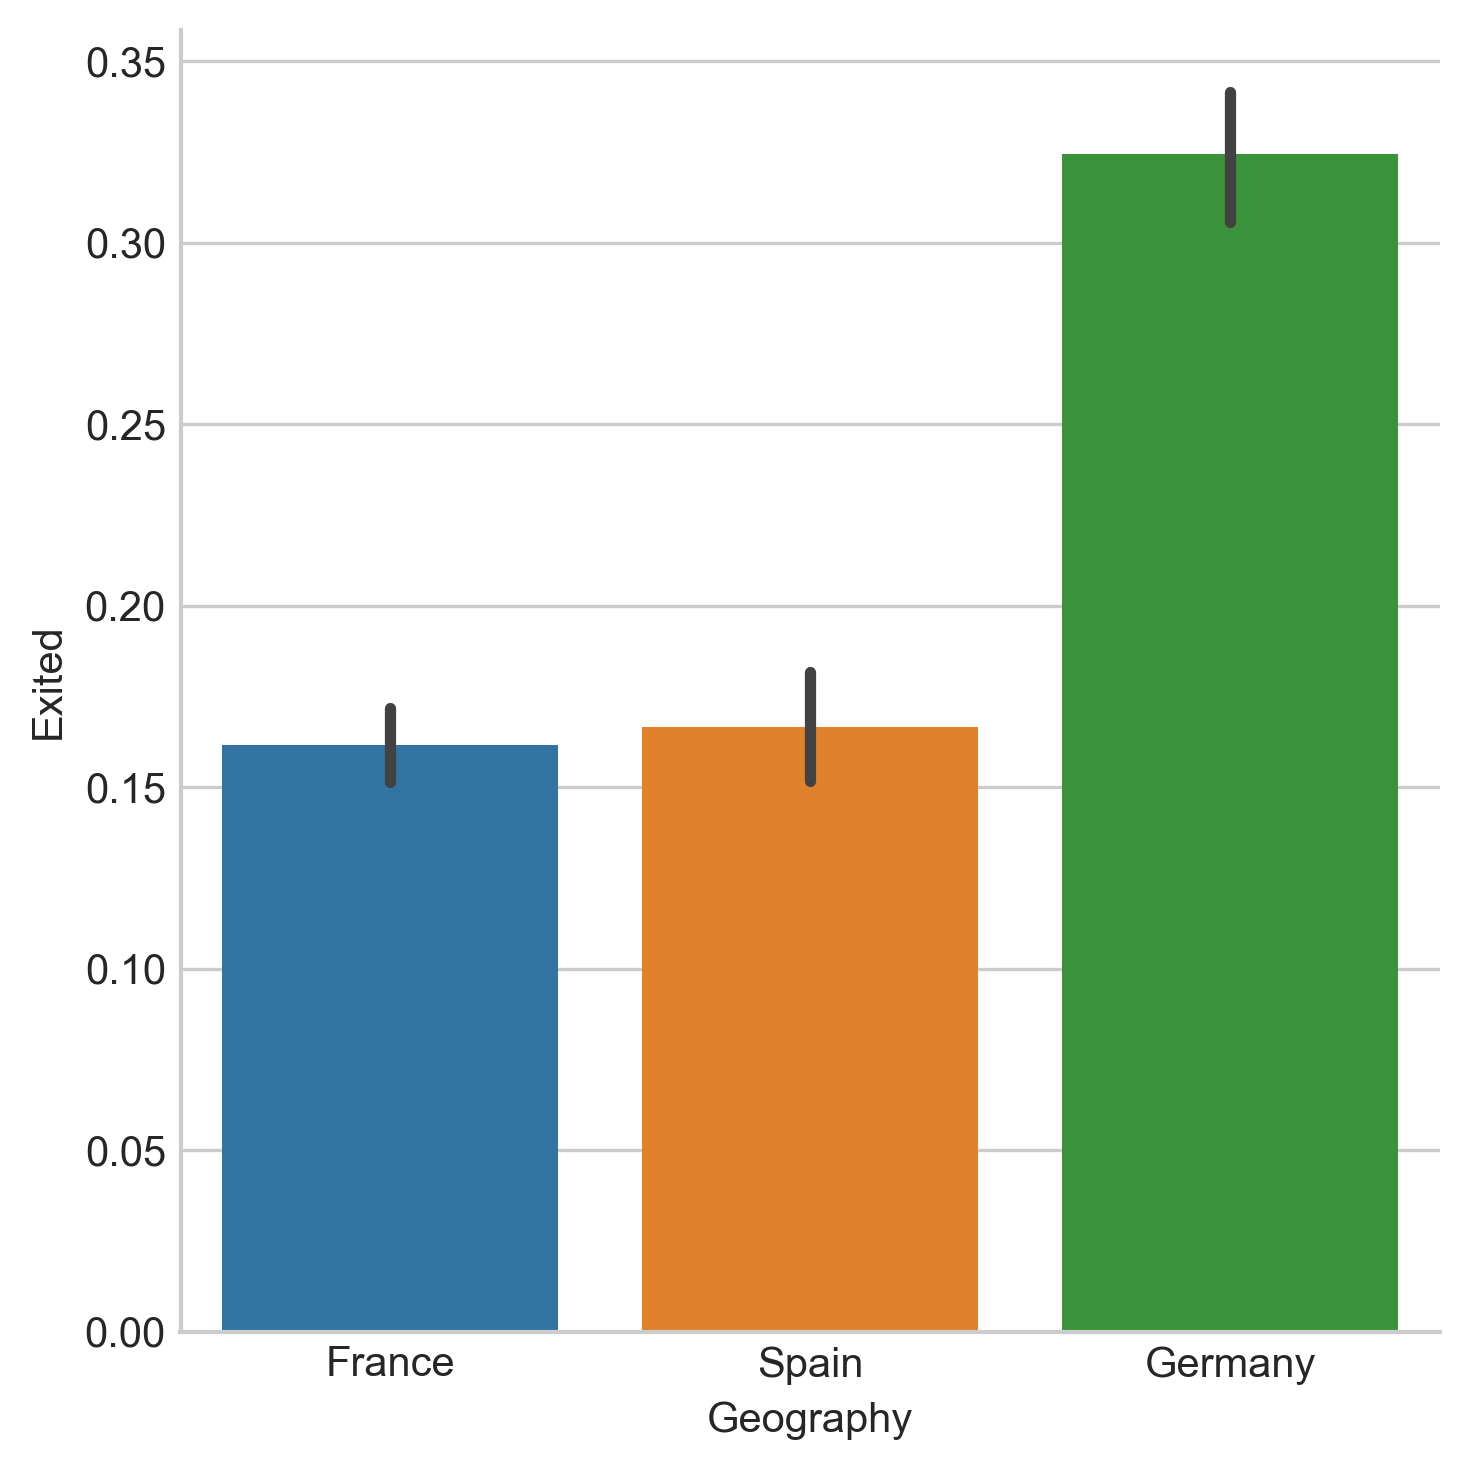

In [17]:
sns.factorplot(x = 'Geography', y='Exited', kind = 'bar', data=df)

C:\Users\Chien Hua Lo\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


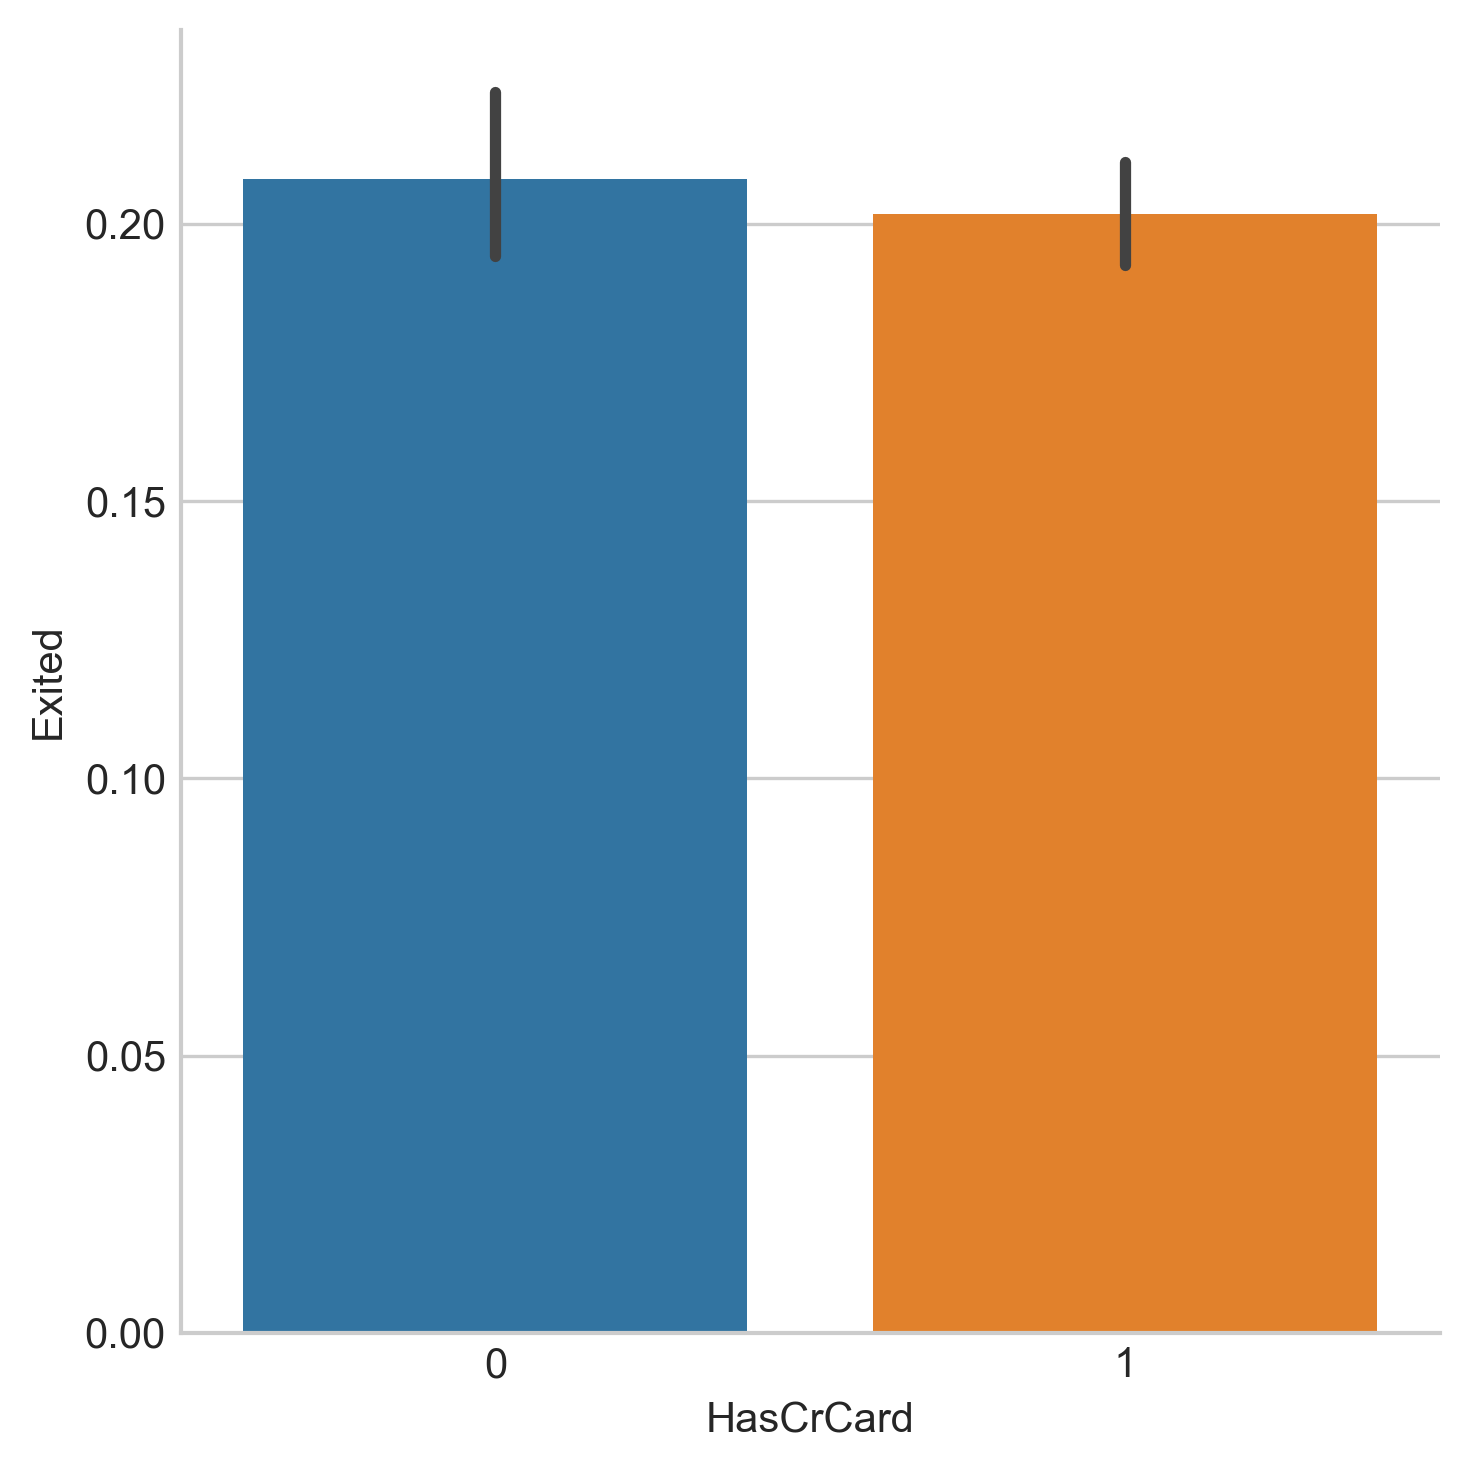

In [18]:
sns.factorplot(x = 'HasCrCard', y='Exited', kind = 'bar', data=df)

C:\Users\Chien Hua Lo\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


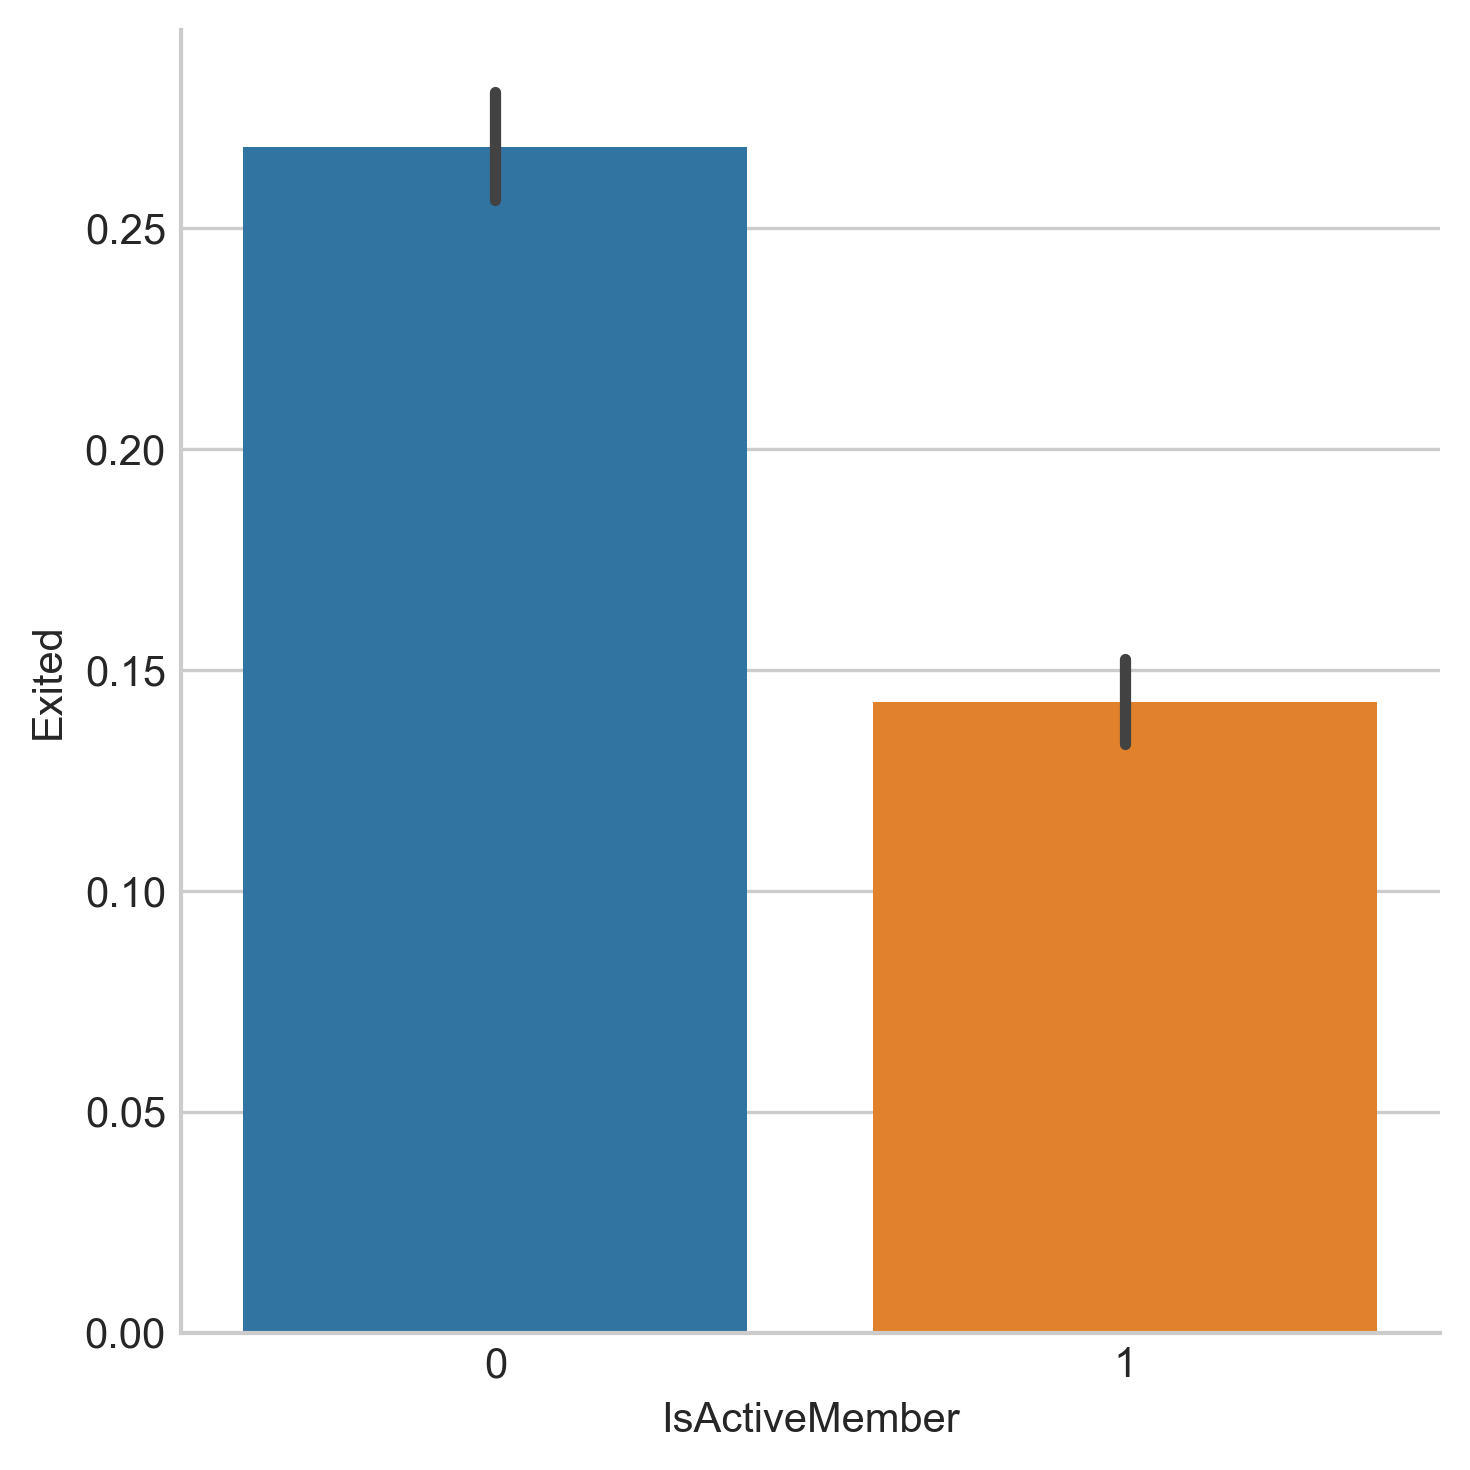

In [19]:
sns.factorplot(x = 'IsActiveMember', y='Exited', kind = 'bar', data=df)

C:\Users\Chien Hua Lo\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


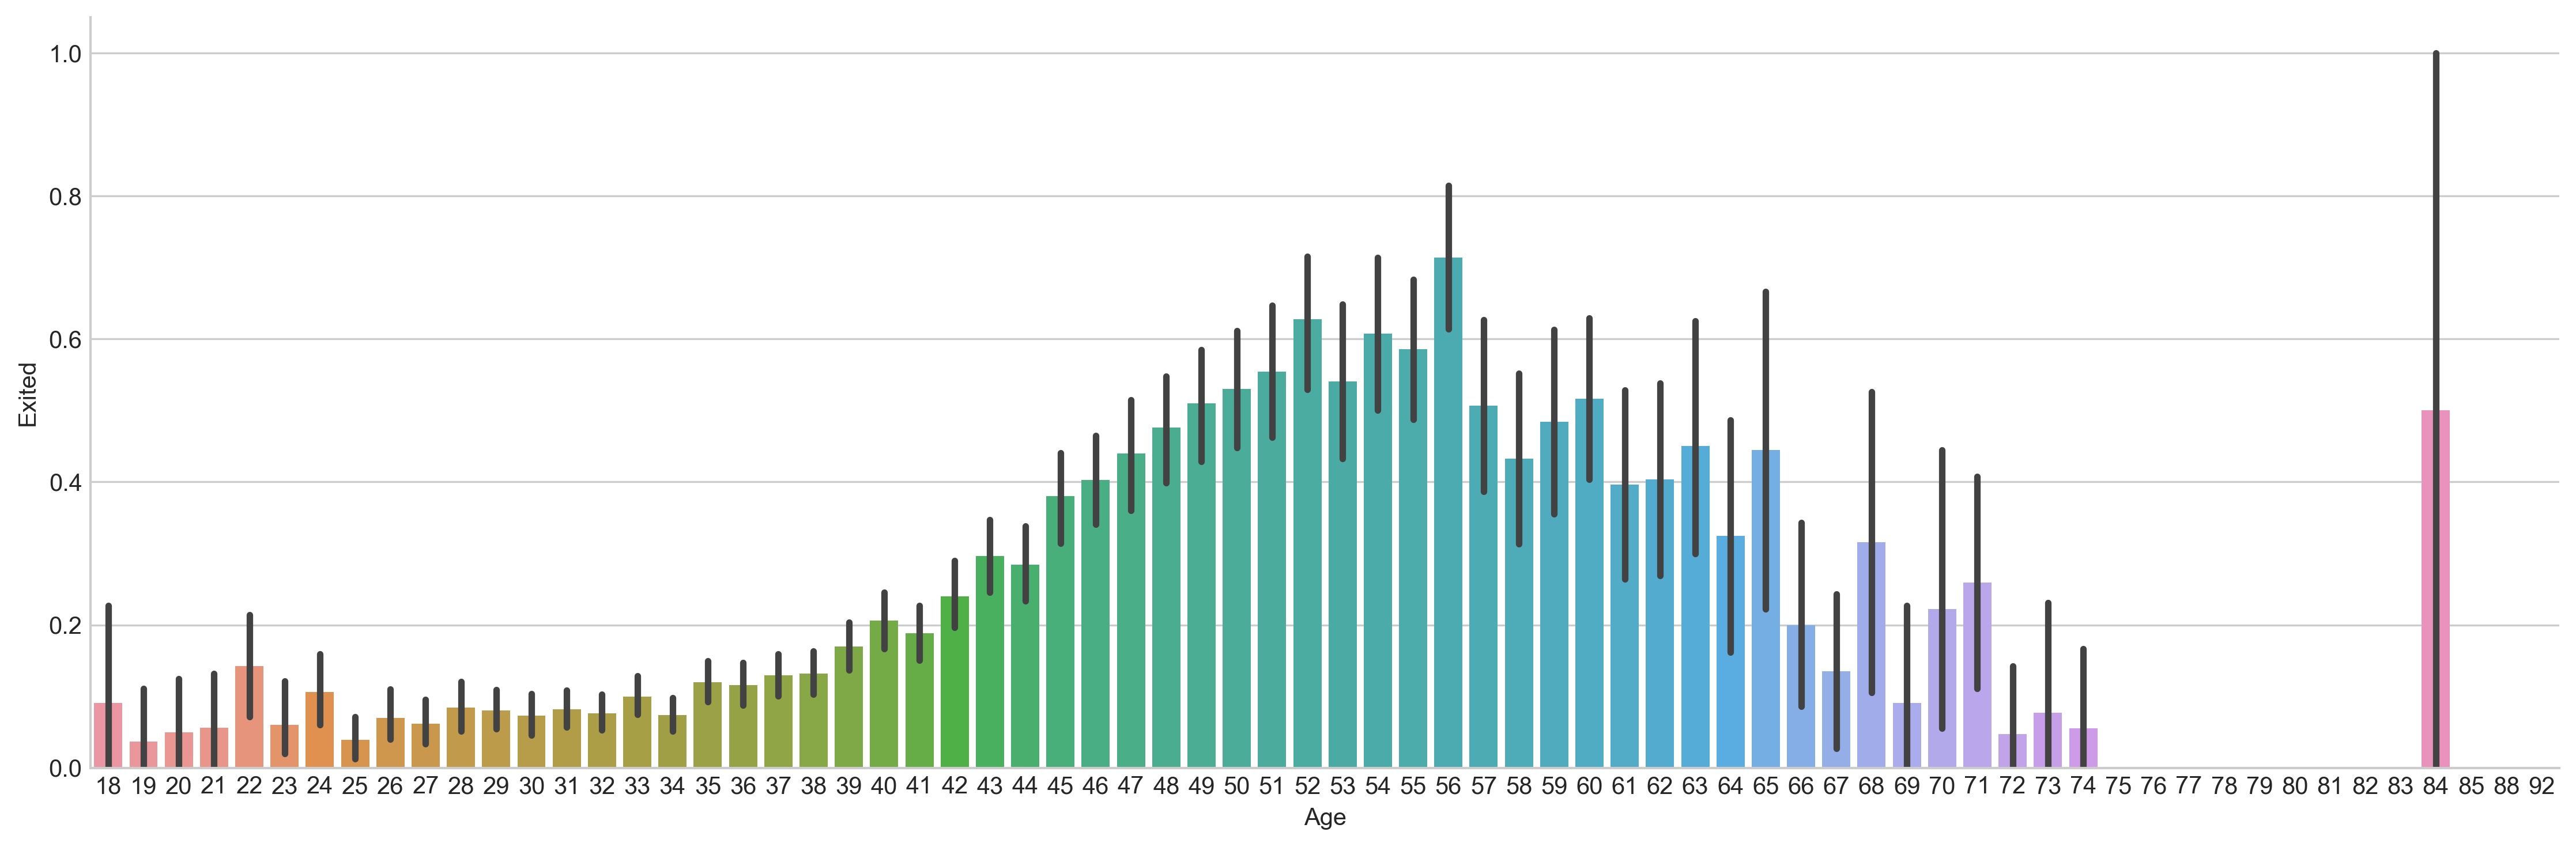

In [20]:
sns.factorplot(x = 'Age', y='Exited', kind = 'bar', data=df, aspect = 3)

C:\Users\Chien Hua Lo\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


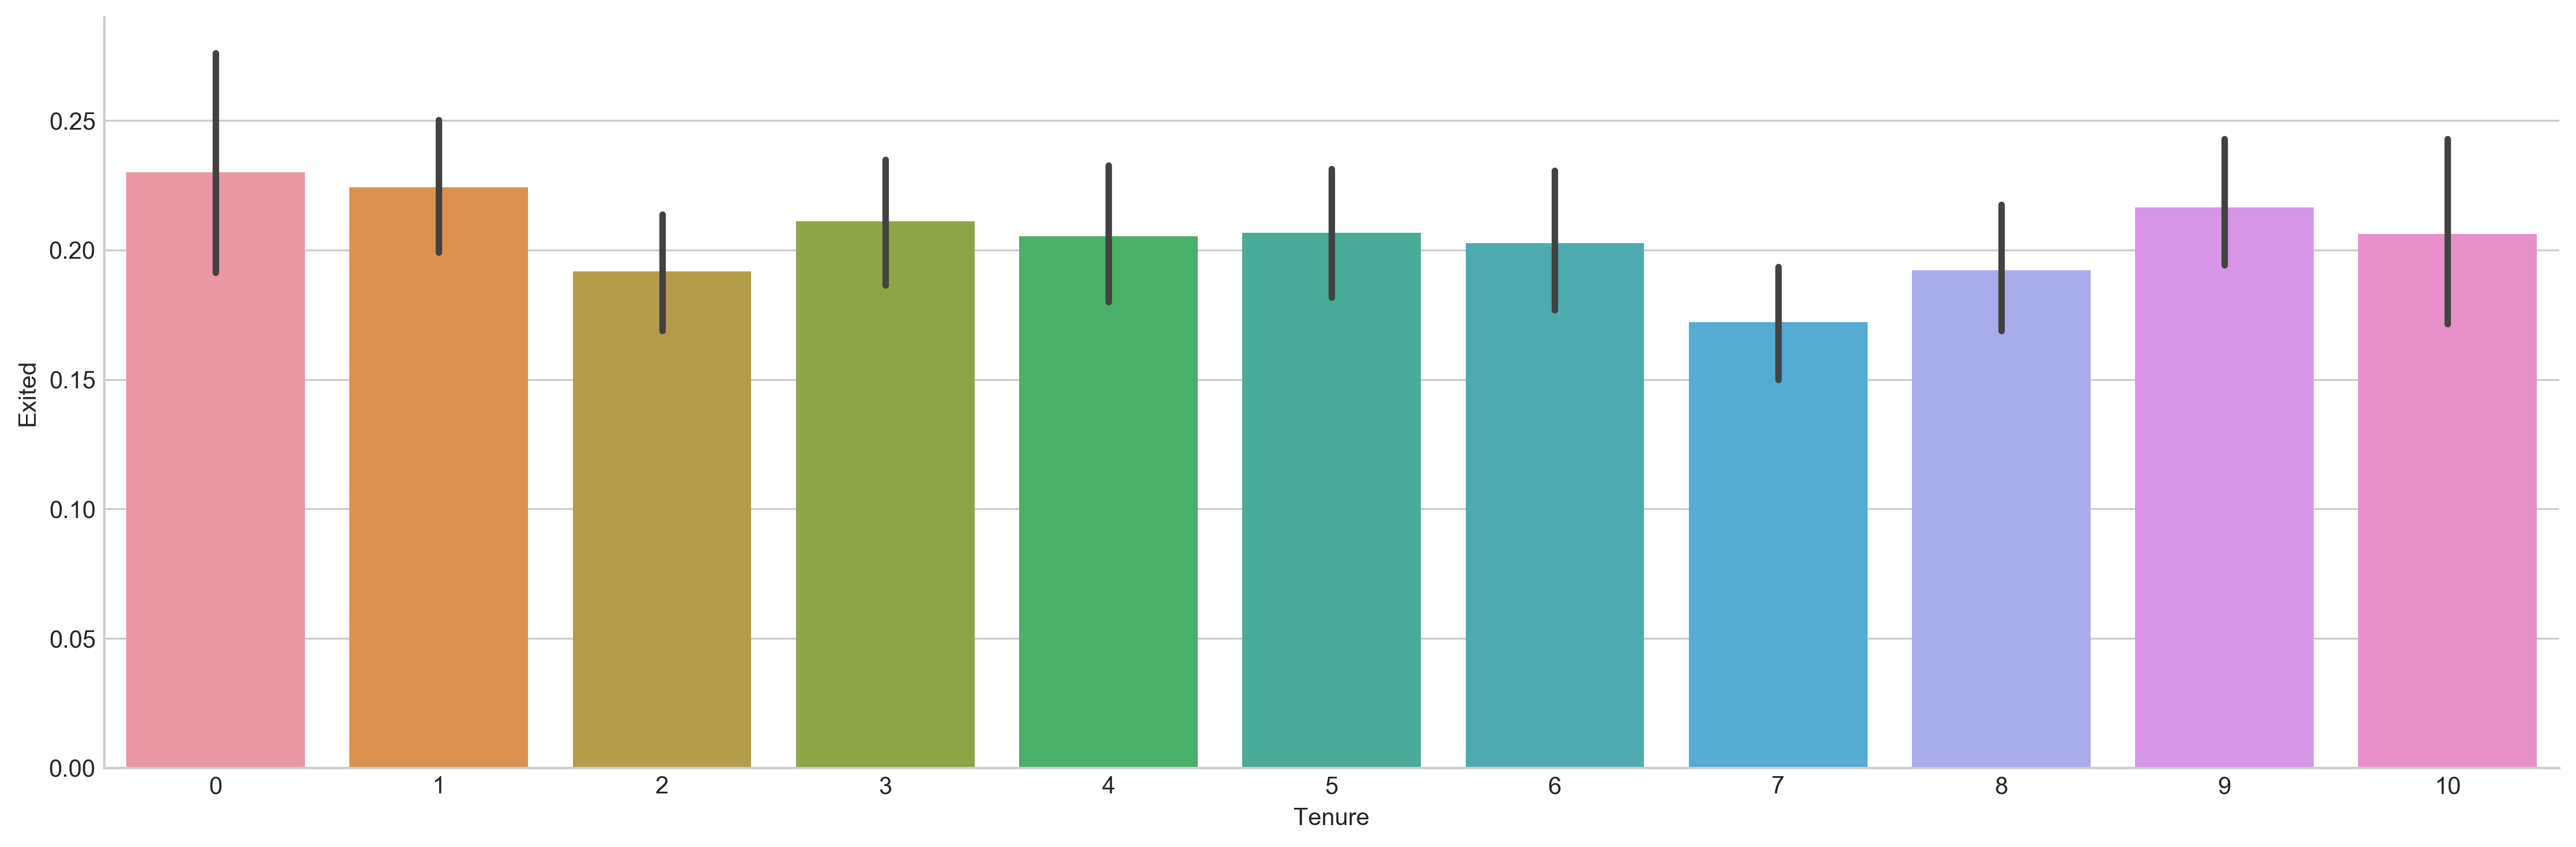

In [21]:
sns.factorplot(x = 'Tenure', y='Exited', kind = 'bar', data=df, aspect = 3)

C:\Users\Chien Hua Lo\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


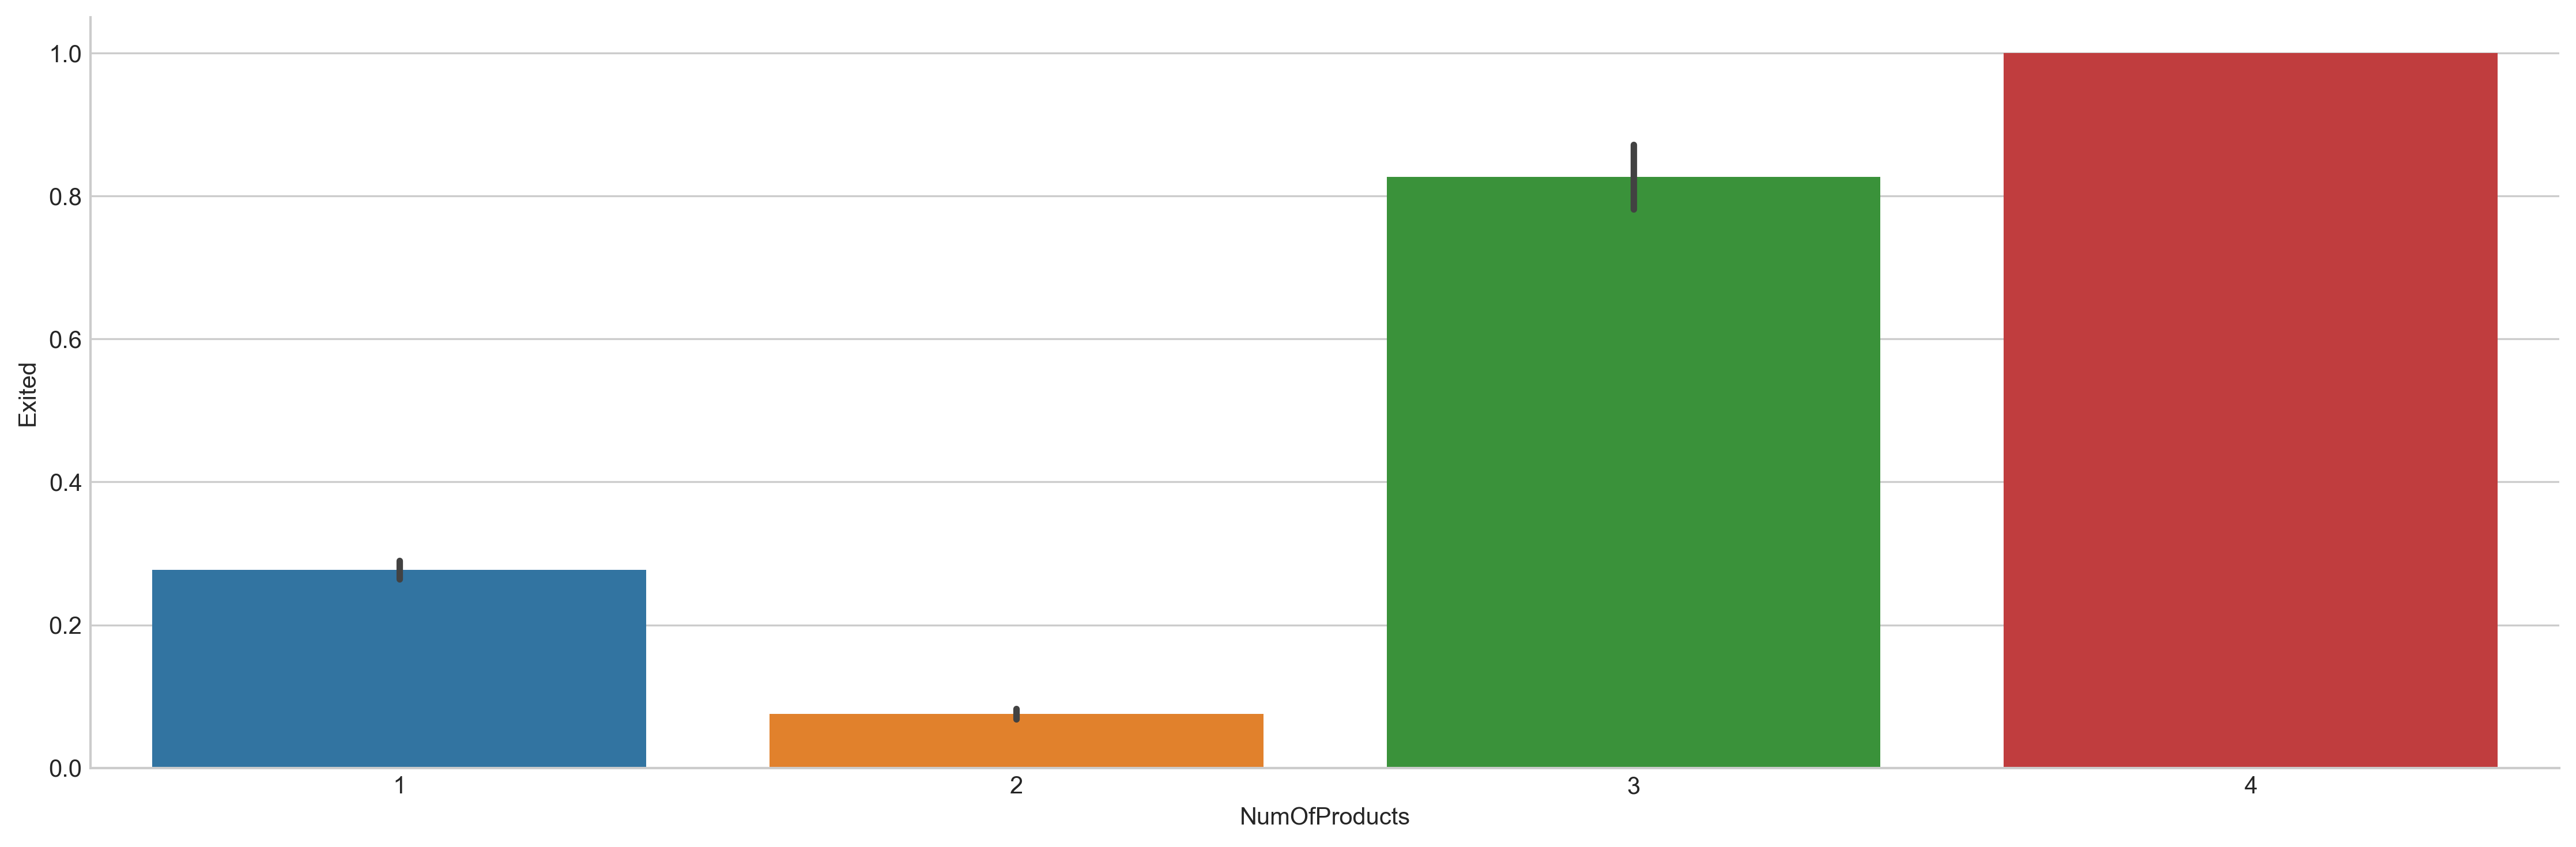

In [22]:
sns.factorplot(x = 'NumOfProducts', y='Exited', kind = 'bar', data=df, aspect = 3)

C:\Users\Chien Hua Lo\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 4500x1200 with 0 Axes>

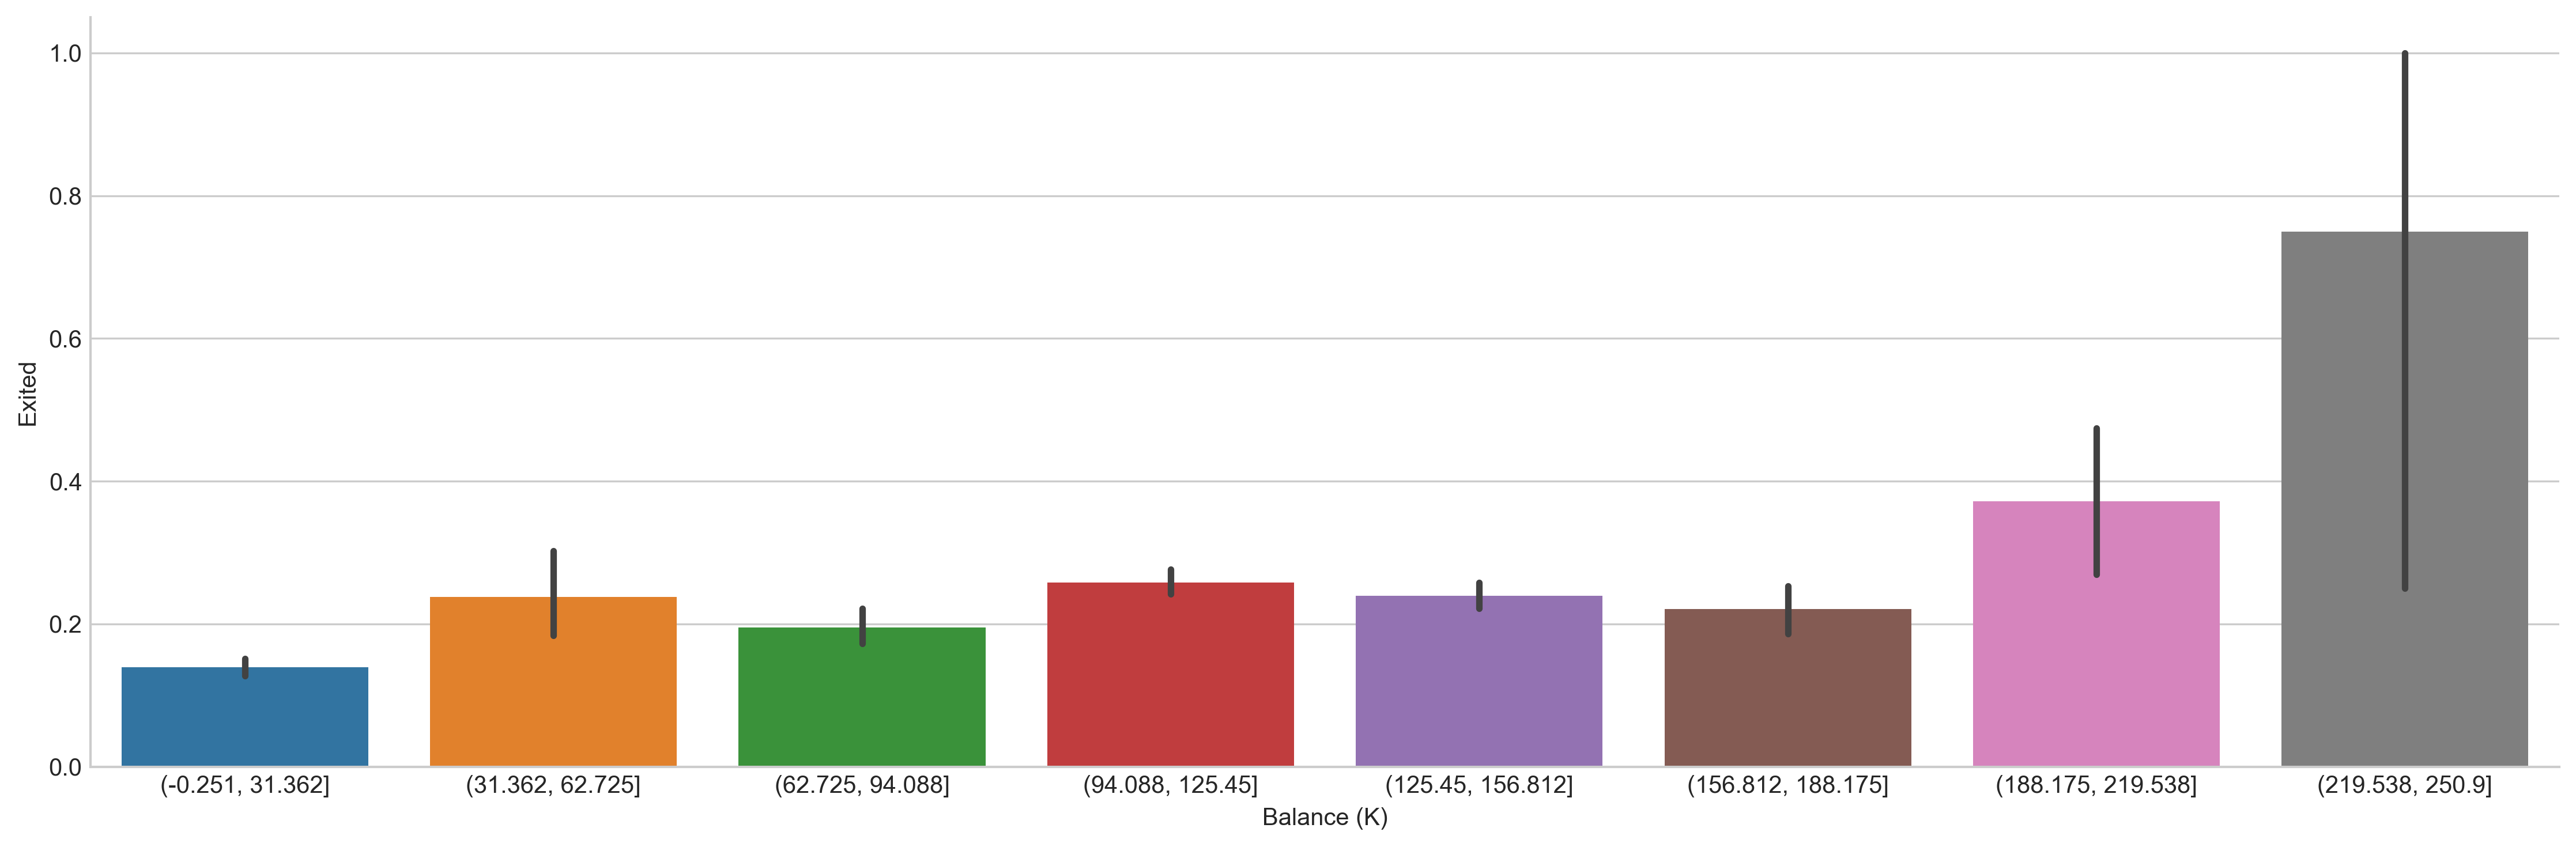

In [23]:
plt.figure(figsize=(15,4))
df["Balance (K)"]=pd.cut(round(df.Balance/1000,1),8)
sns.factorplot(x = 'Balance (K)', y='Exited', kind = 'bar', data=df, aspect = 3)
df = df.drop(['Balance (K)'], axis = 1)

C:\Users\Chien Hua Lo\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 4500x1200 with 0 Axes>

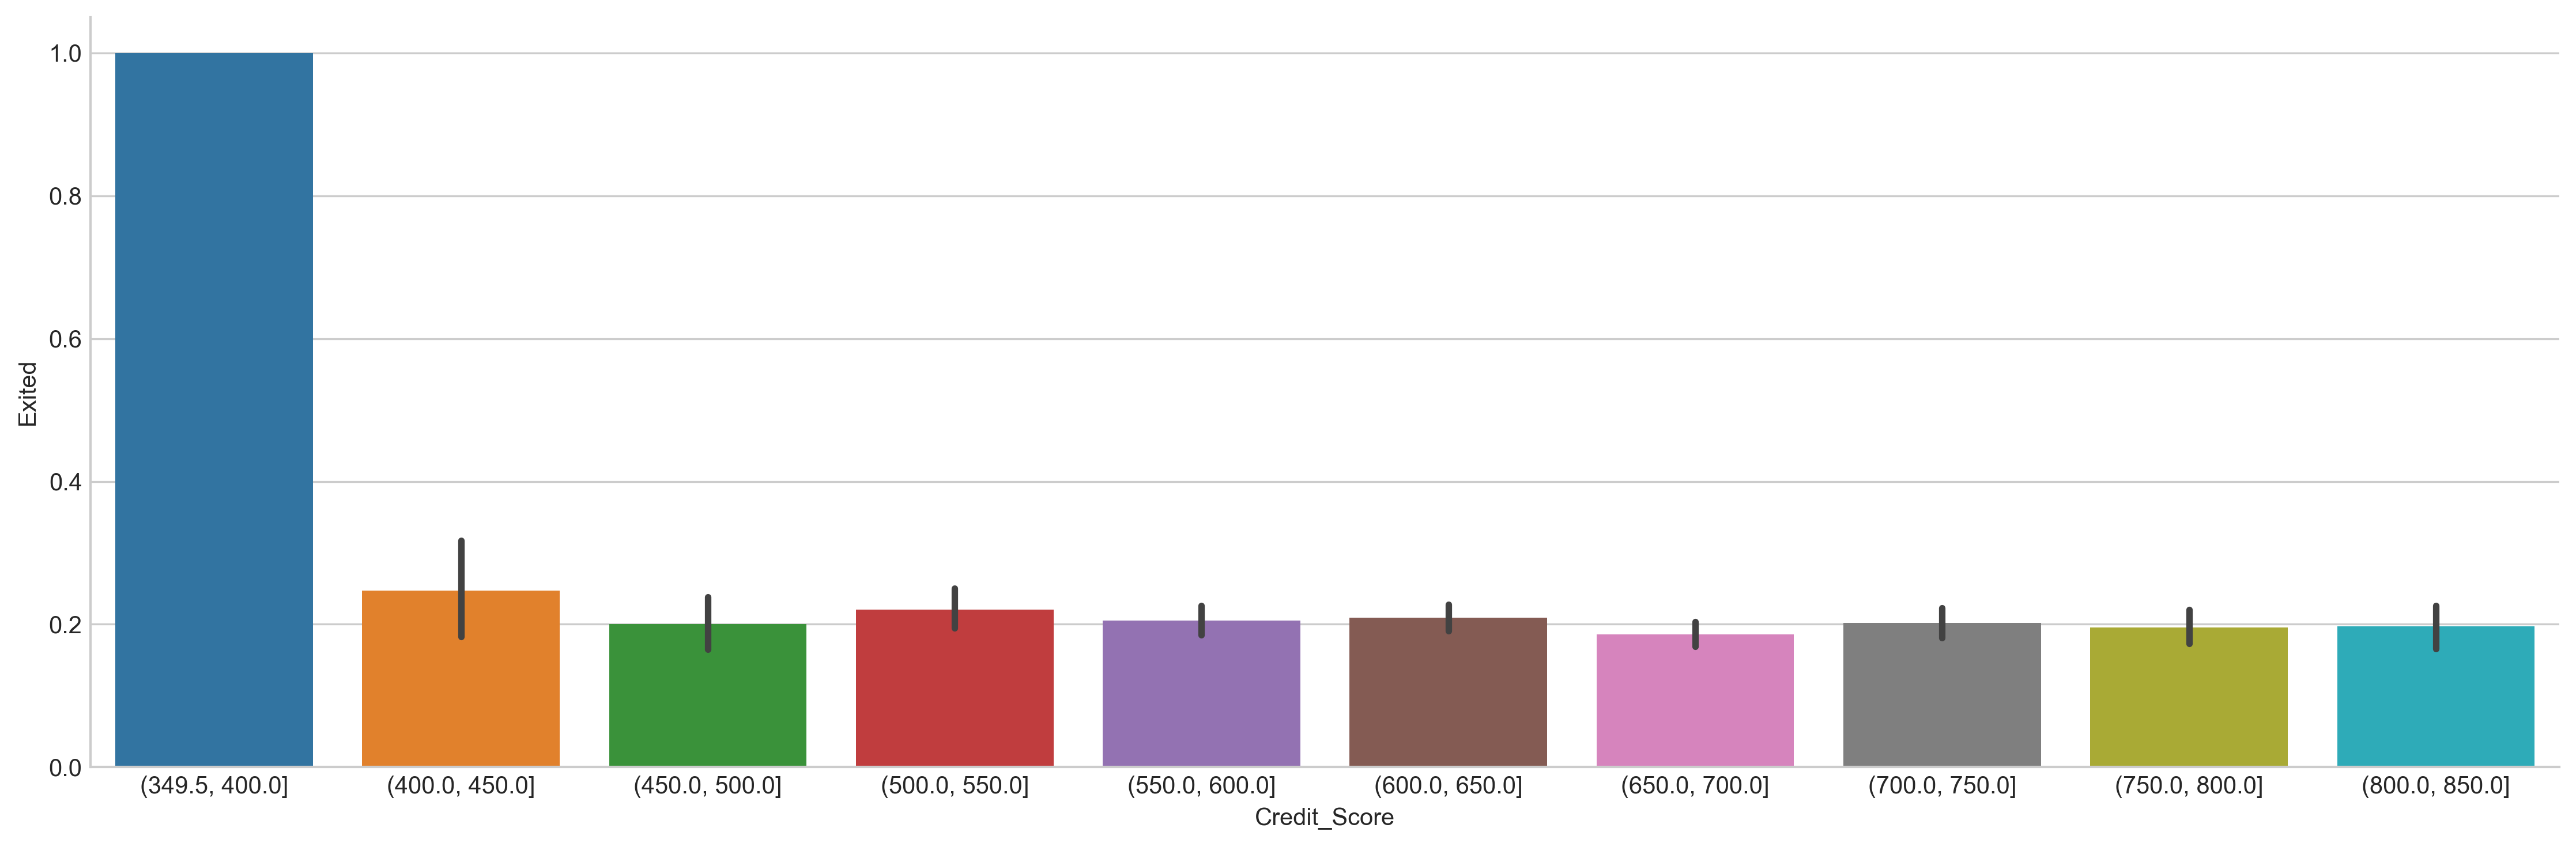

In [24]:
plt.figure(figsize=(15,4))
df["Credit_Score"] = pd.cut(df.CreditScore,10)
sns.factorplot(x = 'Credit_Score', y='Exited', kind = 'bar', data=df, aspect = 3)
df = df.drop(['Credit_Score'], axis = 1)

C:\Users\Chien Hua Lo\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 4500x1200 with 0 Axes>

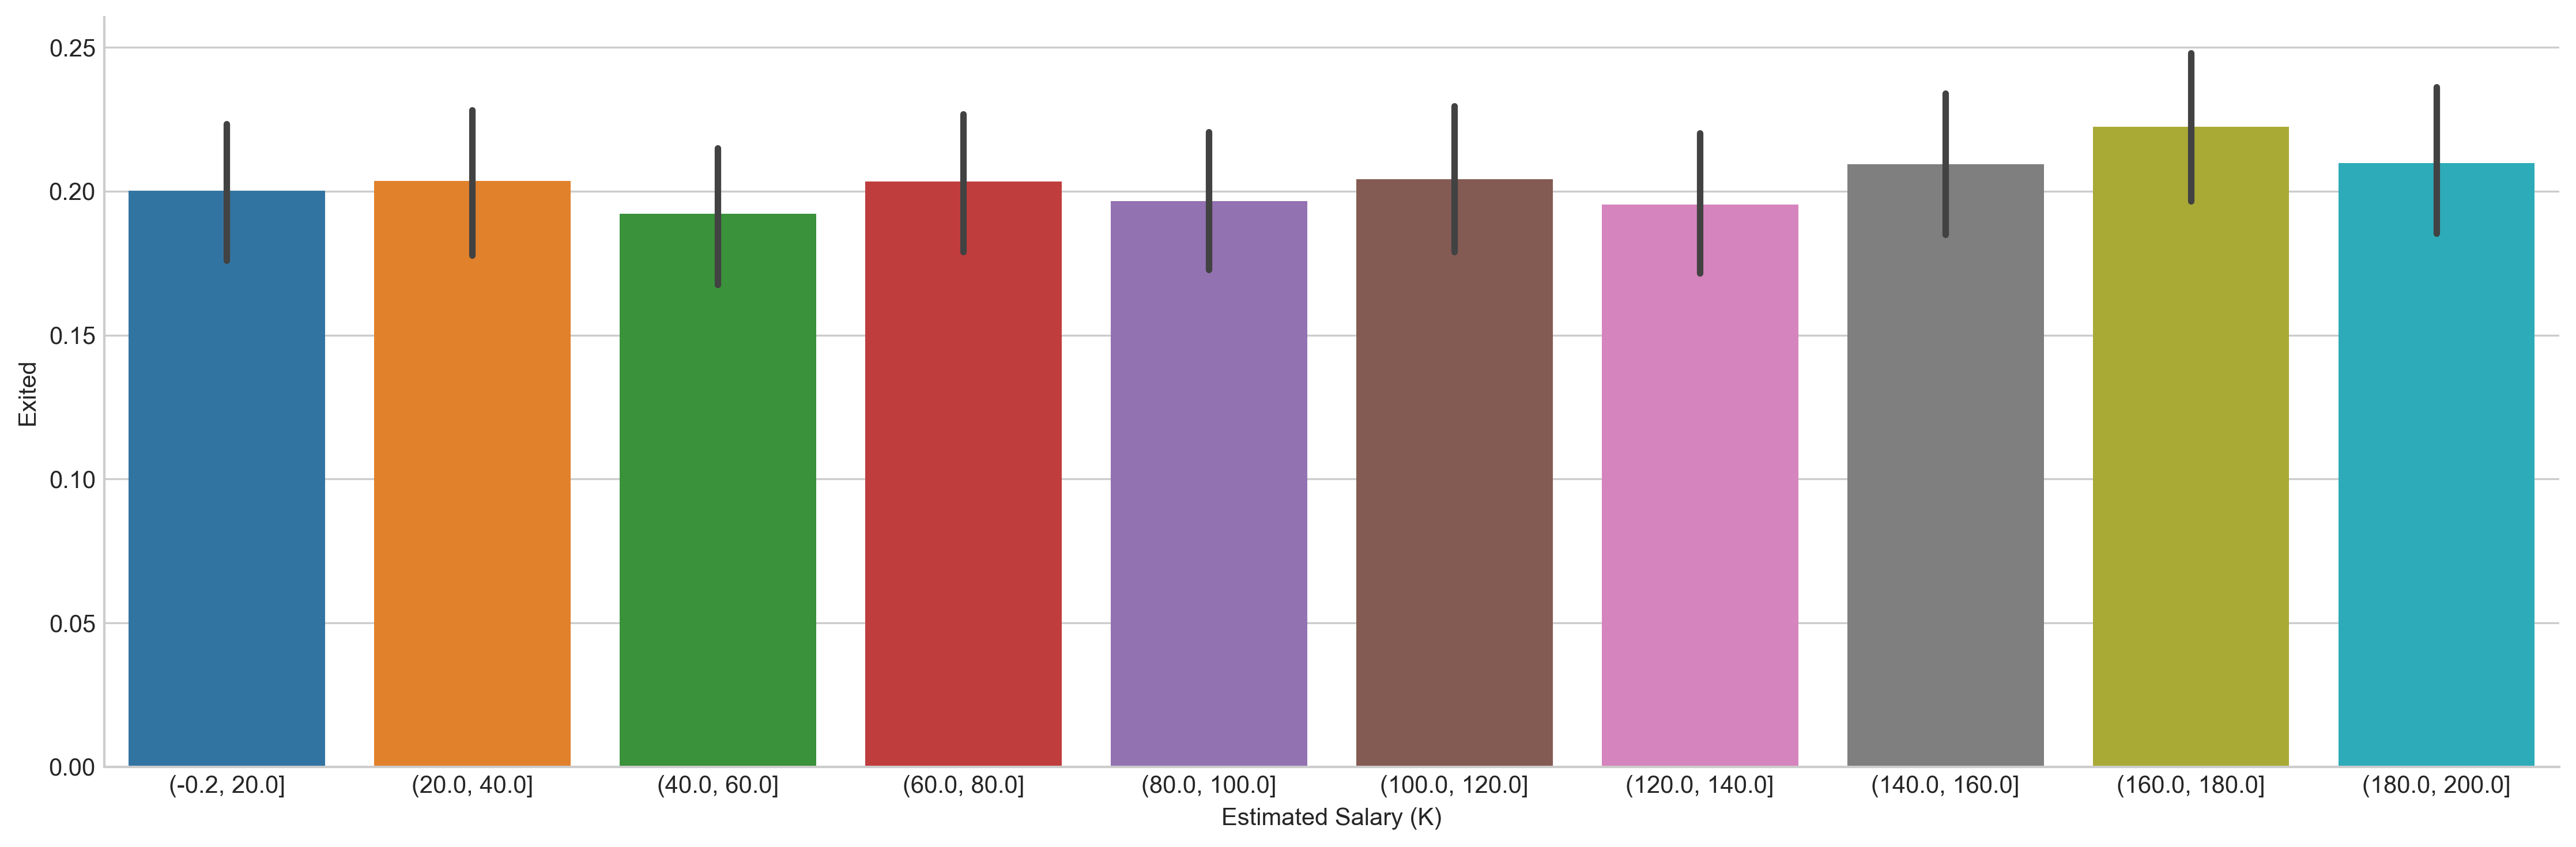

In [25]:
plt.figure(figsize=(15,4))
df["Estimated Salary (K)"]= pd.cut(round(df.EstimatedSalary/1000,1),bins=10)
sns.factorplot(x = 'Estimated Salary (K)', y='Exited', kind = 'bar', data=df, aspect = 3)
df = df.drop(['Estimated Salary (K)'], axis = 1)

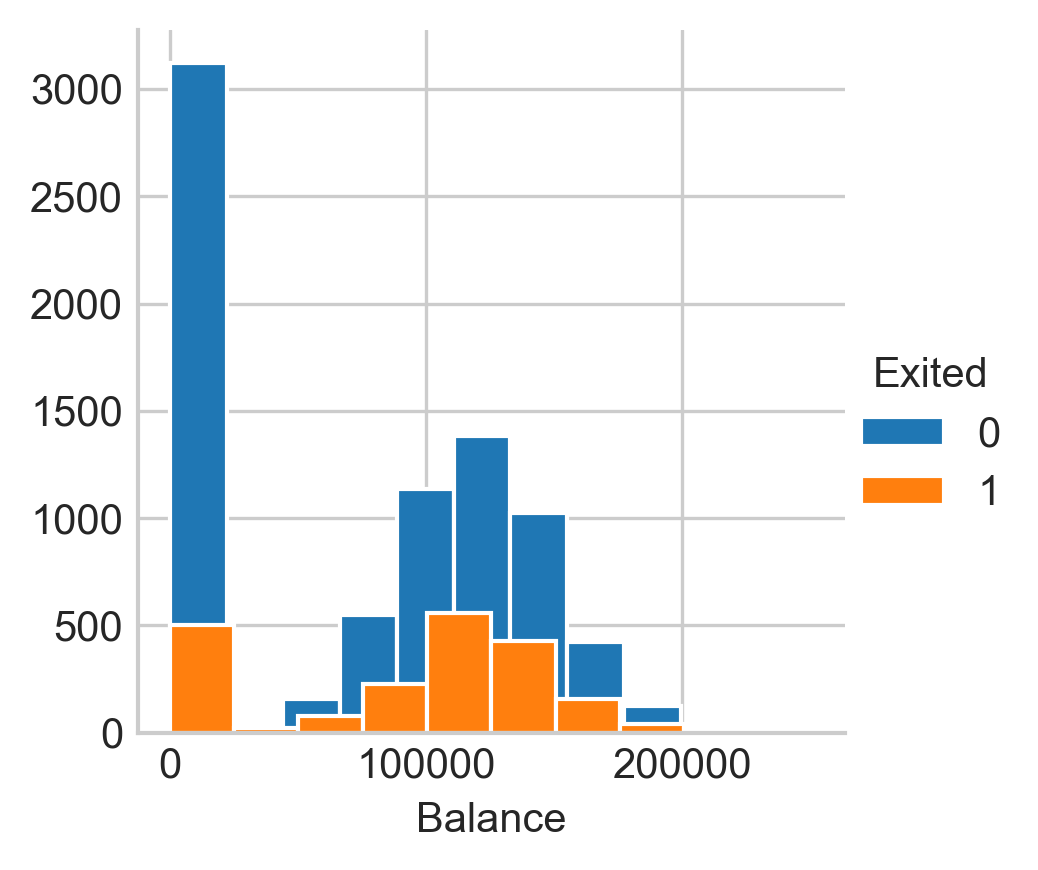

In [26]:
g = sns.FacetGrid(df,hue = 'Exited')
(g.map(plt.hist,'Balance',edgecolor="w").add_legend())

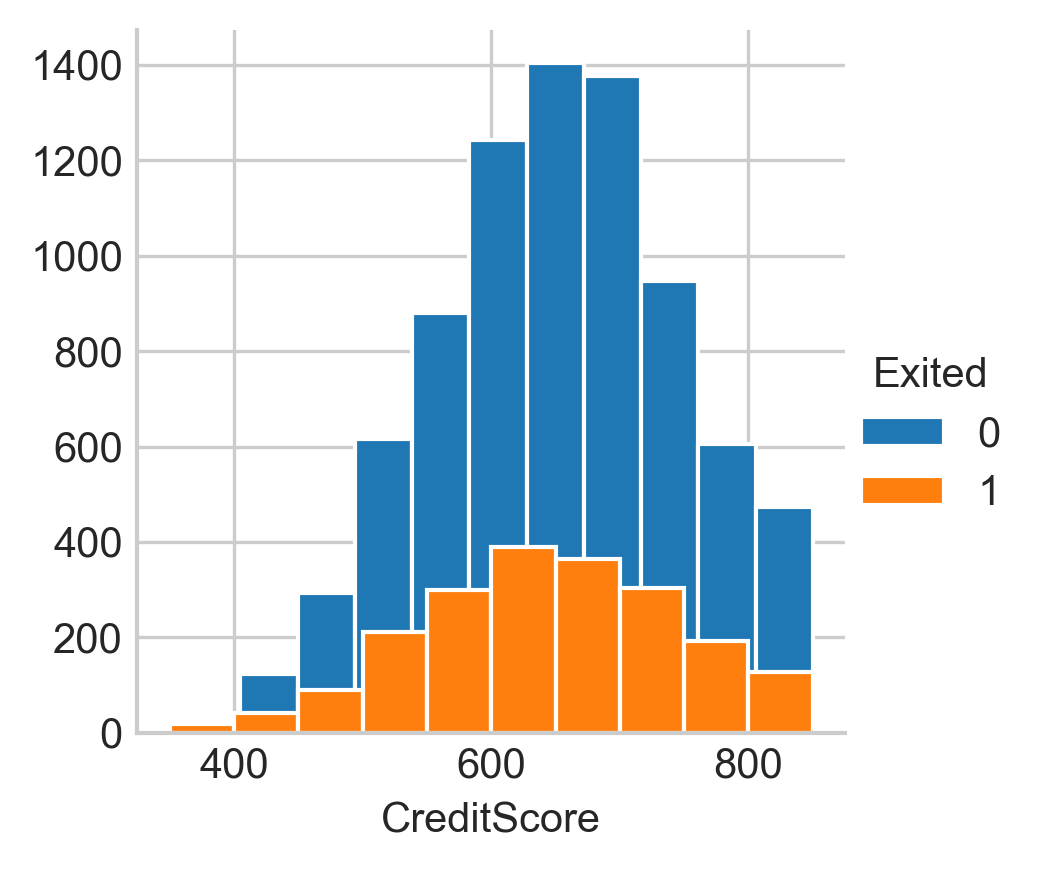

In [27]:
g = sns.FacetGrid(df,hue = 'Exited')
(g.map(plt.hist,'CreditScore',edgecolor="w").add_legend())

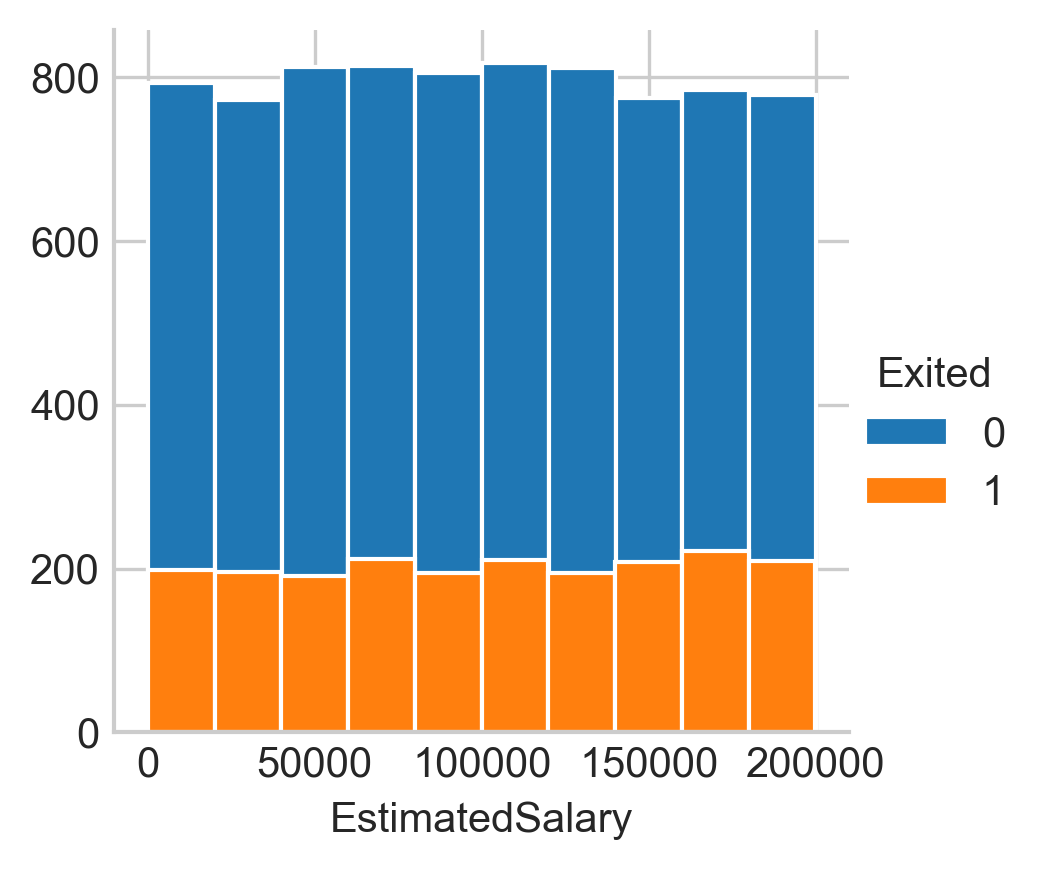

In [28]:
g = sns.FacetGrid(df,hue = 'Exited')
(g.map(plt.hist,'EstimatedSalary',edgecolor="w").add_legend())

In [29]:
#對種類的變數做one-hot encoding
df = pd.get_dummies(df)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


In [30]:
#machine learning
#載入套件
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [31]:
#Logistic Regression

Y = df.Exited.values
X = df.drop(['Exited'], axis = 1)

# Normalize
x=(X-np.min(X))/(np.max(X)-np.min(X)).values

x_train, x_test, y_train, y_test = train_test_split(x,Y,test_size = 0.2,random_state=0)

lr = LogisticRegression()
lr.fit(x_train,y_train)
print("Test Accuracy {:.2f}%".format(lr.score(x_test,y_test)*100))

Test Accuracy 81.20%


In [32]:
# KNN Model
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)

print("{} NN Score: {:.2f}%".format(2, knn.score(x_test, y_test)*100))

2 NN Score: 81.70%


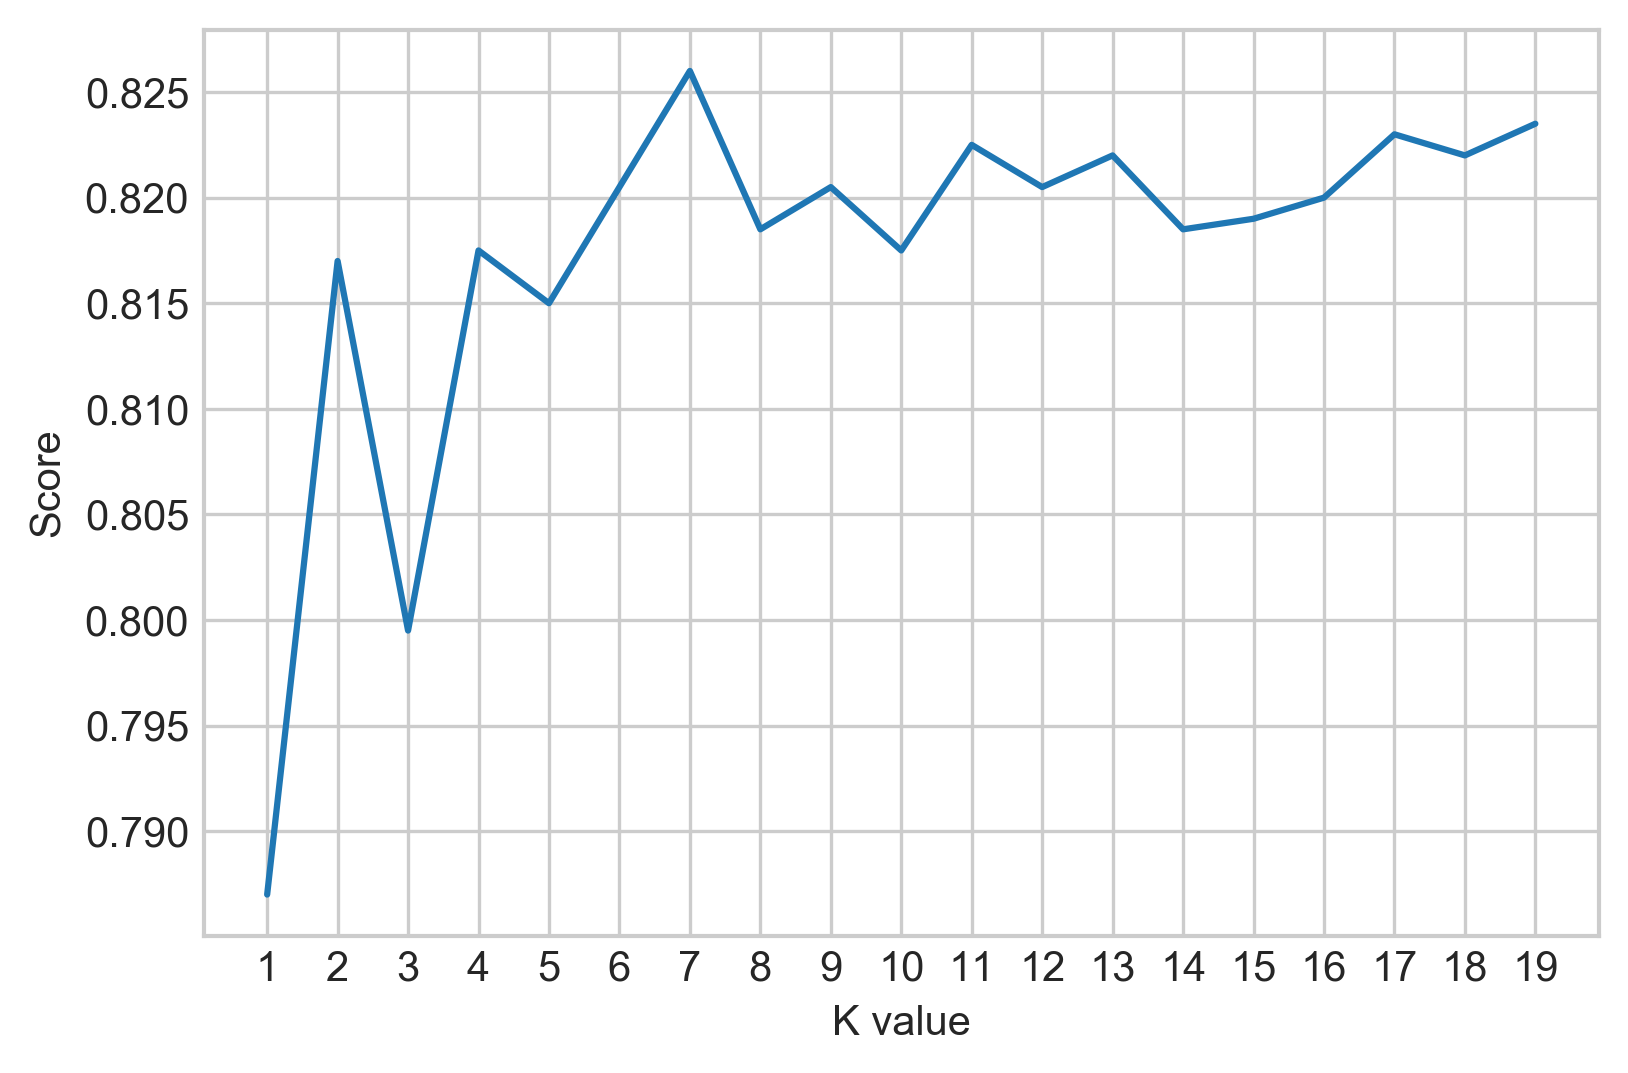

Maximum KNN Score is 82.60%


In [33]:
# try ro find best k value
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train, y_train)
    scoreList.append(knn2.score(x_test, y_test))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

print("Maximum KNN Score is {:.2f}%".format((max(scoreList))*100))

In [34]:
#SVM model
svm = SVC(random_state = 1)
svm.fit(x_train, y_train)
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(svm.score(x_test,y_test)*100))

Test Accuracy of SVM Algorithm: 84.70%


In [35]:
# Naive Bayes Algorithm
nb = GaussianNB()
nb.fit(x_train, y_train)
print("Accuracy of Naive Bayes: {:.2f}%".format(nb.score(x_test,y_test)*100))

Accuracy of Naive Bayes: 80.35%


In [36]:
# Decision Tree Algorithm
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
print("Decision Tree Test Accuracy {:.2f}%".format(dtc.score(x_test, y_test)*100))

Decision Tree Test Accuracy 79.90%


In [37]:
# Random Forest Classification
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train, y_train)
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(rf.score(x_test,y_test)*100))

Random Forest Algorithm Accuracy Score : 86.55%


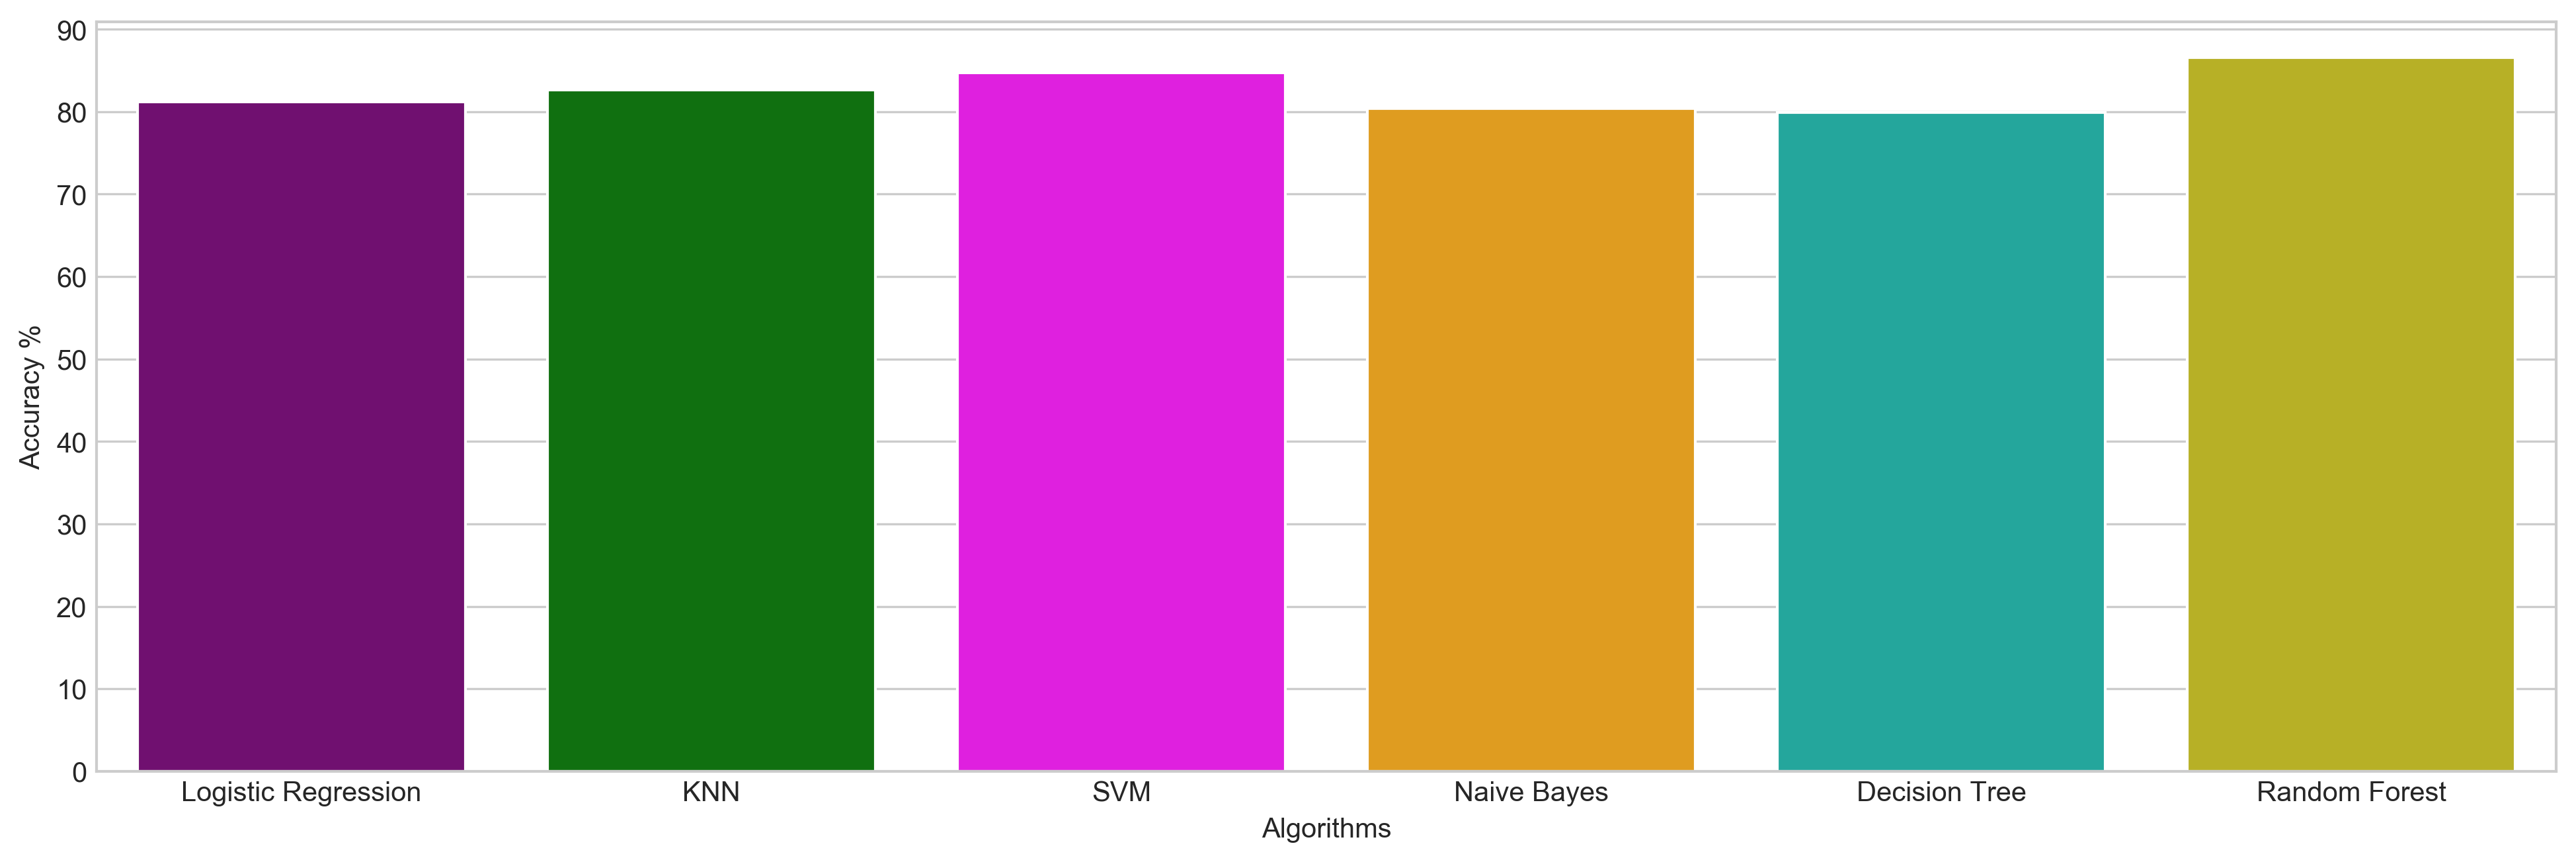

In [38]:
#compare models
methods = ["Logistic Regression", "KNN", "SVM", "Naive Bayes", "Decision Tree", "Random Forest"]
accuracy = [lr.score(x_test,y_test)*100, max(scoreList)*100, 
            svm.score(x_test,y_test)*100, nb.score(x_test,y_test)*100, 
            dtc.score(x_test, y_test)*100, rf.score(x_test,y_test)*100]
colors = ["purple", "green","magenta", "orange", "#0FBBAE","#CFC60E"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=methods, y=accuracy, palette=colors)
plt.show()

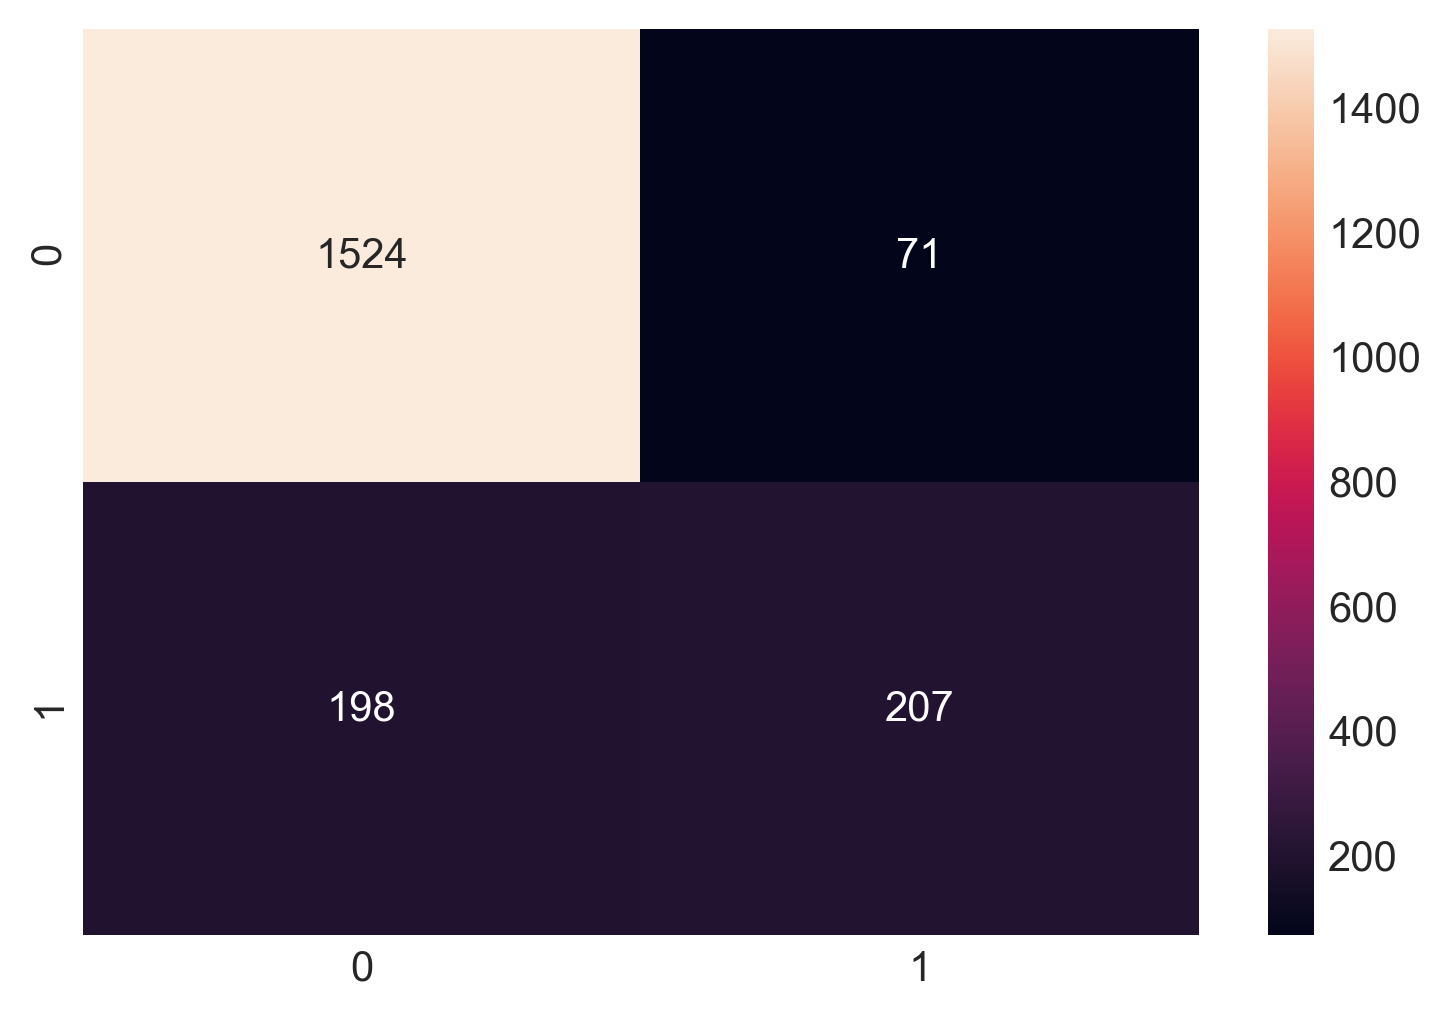

In [39]:
#Random Forest – Confusion Matrix
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, rf.predict(x_test))
sns.heatmap(conf_mat,annot=True,fmt='d')

In [40]:
#Random Forest-查看變數的重要程度
feature_imp = pd.Series(rf.feature_importances_,index=x_train.columns).sort_values(ascending=False)
feature_imp

Age                  0.237419
EstimatedSalary      0.147713
CreditScore          0.144411
Balance              0.143613
NumOfProducts        0.127573
Tenure               0.083649
IsActiveMember       0.037254
Geography_Germany    0.021131
HasCrCard            0.018671
Geography_France     0.010987
Geography_Spain      0.009224
Gender_Male          0.009217
Gender_Female        0.009137
dtype: float64

No handles with labels found to put in legend.


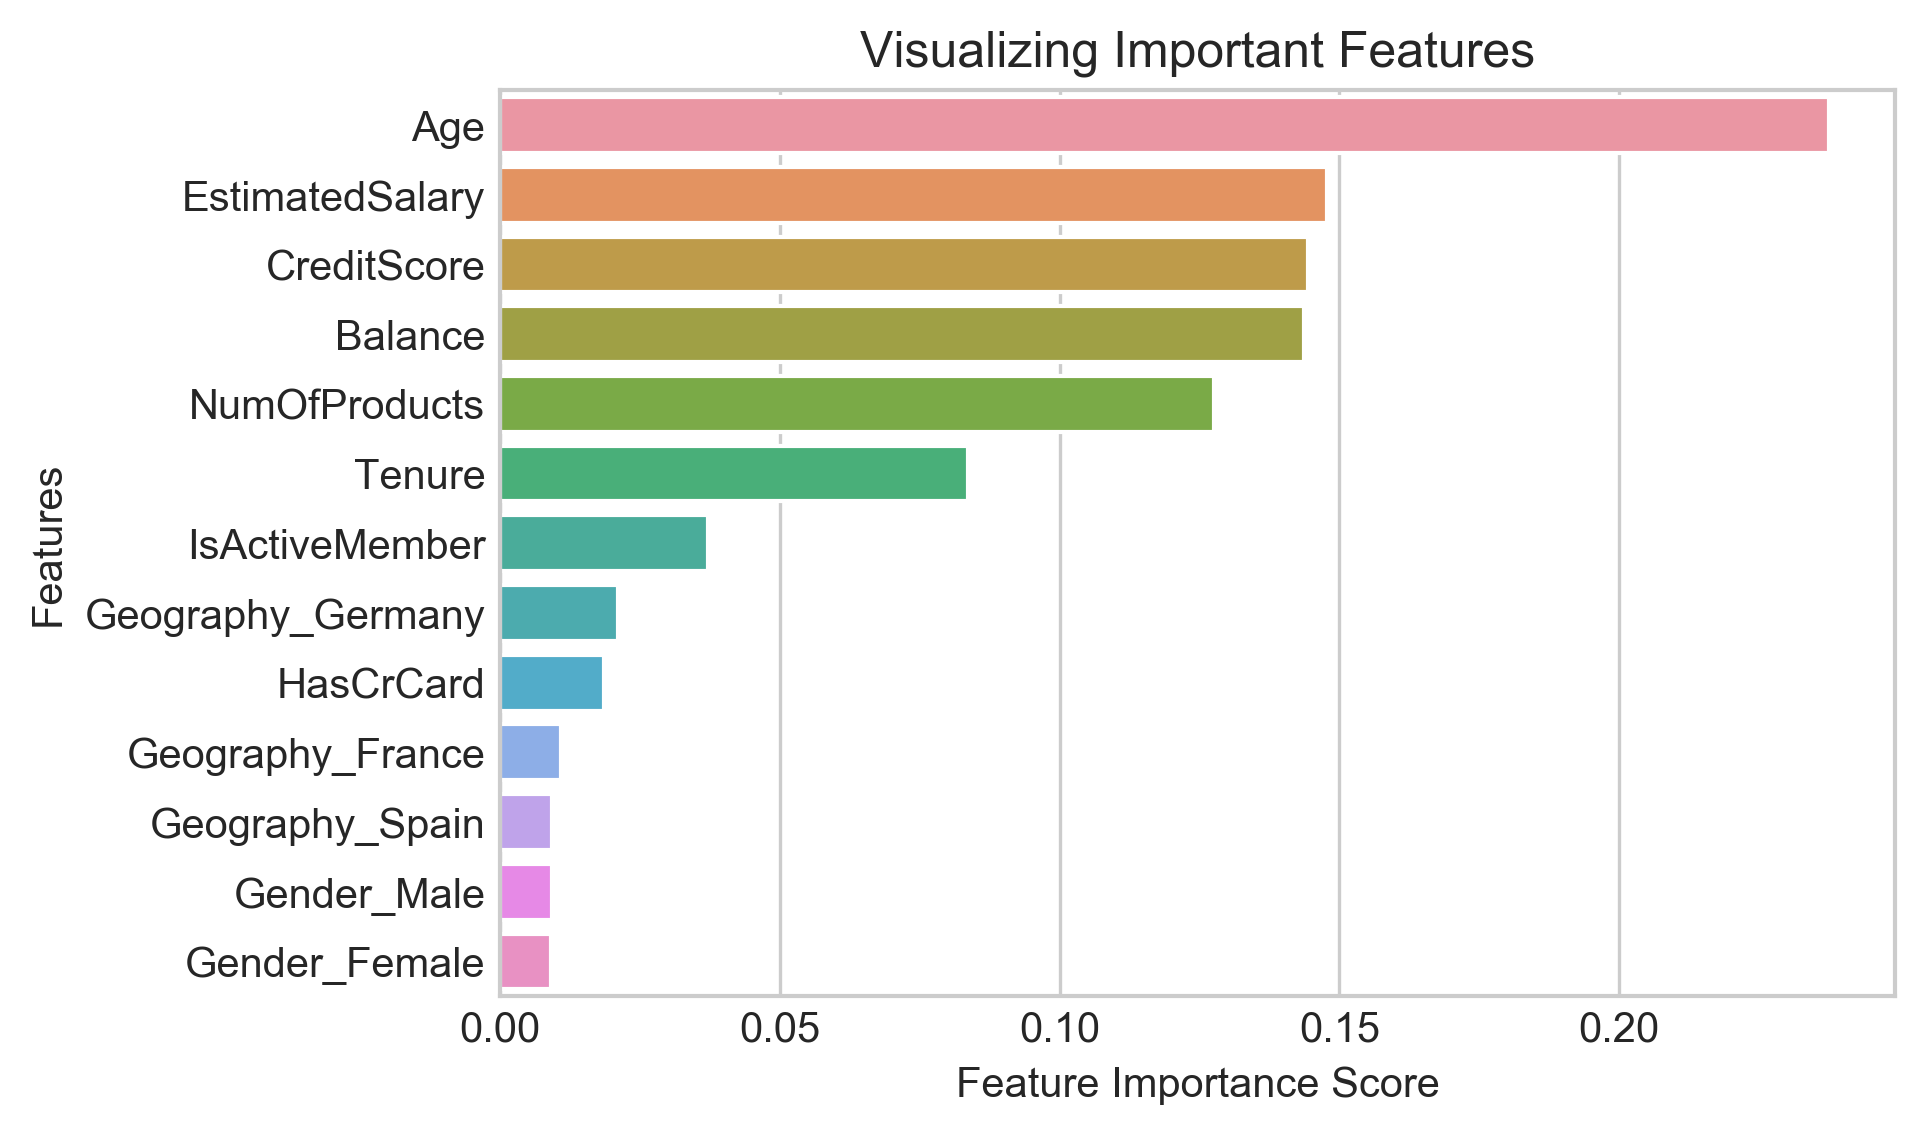

In [41]:
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()